
# Dataset: Estadísticas de jugadores de Fifa 2021.

### Objetivo GENERAL:
* Desarrollar un modelo de regresión lineal que prediga el Overall (OVA) de los jugadores de FIFA 21 basado en sus características, con el fin de entender y predecir la calidad general de los jugadores en el juego.

### Objetivos ESPECIFICOS:
1. Preprocesamiento de Datos:
  * Realizar un análisis exploratorio de datos (EDA) para comprender la distribución y la calidad de los datos, así como identificar posibles problemas como valores faltantes y valores atípicos.
  * Codificar las características categóricas y manejar los valores faltantes de manera apropiada para preparar los datos para el modelado.
2. Modelado de Regresión Lineal:
  * Construir un modelo de regresión lineal utilizando las características seleccionadas como variables predictoras y el OVA como la variable objetivo.
  * Evaluar el rendimiento del modelo utilizando métricas de evaluación de regresión, como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
3. Selección de Características:
  * Realizar análisis de importancia de características para identificar las características más relevantes para predecir el OVA de los jugadores.
  * Explorar técnicas de selección de características, como la eliminación recursiva de características (RFE), para mejorar la precisión del modelo.
4. Validación del Modelo:
  * Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.
  * Utilizar técnicas de validación cruzada para garantizar la robustez del modelo y evitar el sobreajuste.
5. Interpretación de Resultados:
  * Interpretar los coeficientes del modelo de regresión lineal para comprender la relación entre las características de los jugadores y su OVA.
  * Identificar las características que más influyen en la calidad general de los jugadores según el modelo.

### Integrantes:
- Natalia Mejía.
- Miguel Uribe.
- María Andrea Méndez.
- Nicolás Reyes.


# 1. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import six


import jinja2
from tabulate import tabulate

# 1.1 Análisis preliminar del data set
Hemos quitado algunas columnas, dado que al consultar con expertos de FIFA 21, nos dieron información de aquellas columnas que solo hacen parte del data set para fines complementarios que no representan un valor significativo a nuestro análisis. Adicionalmente, hay columnas que se encuentran completamente vacías o que continen el mismo dato para todas las filas.

In [ ]:
#Leyendo dataset
df = pd.read_csv('/content/fifa21_male2.csv', low_memory=False)
df = df.sample(n=1000)

#Drop de columnas con valores mezclados
df = df.drop(["Hits","Value", "Wage", "Release Clause", "ID", "Name", "Club", "Position", "Player Photo", "Club Logo", "Flag Photo", "Team & Contract", "Growth", "Joined", "Loan Date End", "Contract", "Gender", "Composure", "W/F", "SM", "A/W", "D/W", "IR", "LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB", "GK", "BP"], axis = 1)
#Codificación de foot
df

Age  OVA          Nationality  BOV  POT Height  Weight   foot  \
3722    29   69                Spain   70   69  5'10"  150lbs  Right   
5135    26   64           Montserrat   66   66   6'1"  201lbs  Right   
864     36   65  Republic of Ireland   66   65  5'11"  141lbs  Right   
5827    24   73              Germany   74   76   6'0"  174lbs  Right   
405     35   77                Spain   77   77   5'9"  159lbs  Right   
...    ...  ...                  ...  ...  ...    ...     ...    ...   
3226    27   71              England   71   71   5'9"  150lbs  Right   
11761   24   65              Uruguay   67   72   5'9"  154lbs  Right   
17093   20   60                Ghana   62   75   5'7"  141lbs  Right   
6957    29   72              Senegal   74   72  5'11"  168lbs  Right   
3378    30   71               Mexico   71   71   5'8"  165lbs  Right   

       Attacking  Crossing  ...  GK Positioning  GK Reflexes  Total Stats  \
3722         287        68  ...              15            9         1708   
5135         209        40  ...              16           11         1429   
864          262        51  ...              15           10         1664   
5827         315        67  ...              15            9         1900   
405          371        78  ...              15           12         1909   
...          ...       ...  ...             ...          ...          ...   
3226         274        67  ...              14           10         1646   
11761        292        26  ...               9            5         1515   
17093        247        49  ...               6            6         1566   
6957         322        63  ...               7           10         2083   
3378         306        73  ...              16           13         1838   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  
3722          365   74   64   65   75   33   54  
5135          317   68   28   42   46   64   69  
864           330   32   48   60   55   64   71  
5827          400   75   68   67   77   45   68  
405           397   68   76   76   79   36   62  
...           ...  ...  ...  ...  ...  ...  ...  
3226          366   85   58   62   76   27   58  
11761         329   68   67   48   65   29   52  
17093         341   71   47   58   66   45   54  
6957          449   85   69   70   75   71   79  
3378          395   83   64   65   73   41   69  

[1000 rows x 56 columns]

# 1.2 Limpieza de Datos.
Despues de quitar unas columnas de manera preliminar, decidimos modificar las columnas de "Height" y "Weight" a métricas estadarizadas internacionalmente sin unidades de medida. Por otro lado, se deben quitar las filas que contengan muchos nulos ya que pueden afectar negativamente la predicción.

In [ ]:
def convertir_a_cm(altura):
    pies, pulgadas = altura.split("'")
    pies = int(pies)
    pulgadas = int(pulgadas[:-1])  # Elimina el último carácter (la comilla doble)
    altura_cm = (pies * 12 + pulgadas) * 2.54
    return altura_cm
def convertir_a_kg(peso):
    peso_lbs = int(peso[:-3])  # Elimina "lbs" y convierte a entero
    peso_kg = peso_lbs * 0.453592  # 1 lb = 0.453592 kg
    return peso_kg

In [ ]:
df['Weight'] = df['Weight'].apply(convertir_a_kg)
df.Weight

3722     68.038800
5135     91.171992
864      63.956472
5827     78.925008
405      72.121128
           ...    
3226     68.038800
11761    69.853168
17093    63.956472
6957     76.203456
3378     74.842680
Name: Weight, Length: 1000, dtype: float64

In [ ]:
df['Height'] = df['Height'].apply(convertir_a_cm)
df.Height

3722     177.80
5135     185.42
864      180.34
5827     182.88
405      175.26
          ...  
3226     175.26
11761    175.26
17093    170.18
6957     180.34
3378     172.72
Name: Height, Length: 1000, dtype: float64

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             6
Skill               0
Dribbling           0
Curve               6
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             6
Reactions           0
Balance             6
Power               0
Shot Power          0
Jumping             6
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              6
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      6
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

In [ ]:
df = df.dropna()
df

Age  OVA          Nationality  BOV  POT  Height     Weight   foot  \
3722    29   69                Spain   70   69  177.80  68.038800  Right   
5135    26   64           Montserrat   66   66  185.42  91.171992  Right   
864     36   65  Republic of Ireland   66   65  180.34  63.956472  Right   
5827    24   73              Germany   74   76  182.88  78.925008  Right   
405     35   77                Spain   77   77  175.26  72.121128  Right   
...    ...  ...                  ...  ...  ...     ...        ...    ...   
3226    27   71              England   71   71  175.26  68.038800  Right   
11761   24   65              Uruguay   67   72  175.26  69.853168  Right   
17093   20   60                Ghana   62   75  170.18  63.956472  Right   
6957    29   72              Senegal   74   72  180.34  76.203456  Right   
3378    30   71               Mexico   71   71  172.72  74.842680  Right   

       Attacking  Crossing  ...  GK Positioning  GK Reflexes  Total Stats  \
3722         287        68  ...              15            9         1708   
5135         209        40  ...              16           11         1429   
864          262        51  ...              15           10         1664   
5827         315        67  ...              15            9         1900   
405          371        78  ...              15           12         1909   
...          ...       ...  ...             ...          ...          ...   
3226         274        67  ...              14           10         1646   
11761        292        26  ...               9            5         1515   
17093        247        49  ...               6            6         1566   
6957         322        63  ...               7           10         2083   
3378         306        73  ...              16           13         1838   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  
3722          365   74   64   65   75   33   54  
5135          317   68   28   42   46   64   69  
864           330   32   48   60   55   64   71  
5827          400   75   68   67   77   45   68  
405           397   68   76   76   79   36   62  
...           ...  ...  ...  ...  ...  ...  ...  
3226          366   85   58   62   76   27   58  
11761         329   68   67   48   65   29   52  
17093         341   71   47   58   66   45   54  
6957          449   85   69   70   75   71   79  
3378          395   83   64   65   73   41   69  

[994 rows x 56 columns]

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

Al notar que habían filas que contenían columnas en nulo, se eliminaron.

# 1.3. Gráficas del EDA.

In [ ]:
df

Age  OVA          Nationality  BOV  POT  Height     Weight   foot  \
3722    29   69                Spain   70   69  177.80  68.038800  Right   
5135    26   64           Montserrat   66   66  185.42  91.171992  Right   
864     36   65  Republic of Ireland   66   65  180.34  63.956472  Right   
5827    24   73              Germany   74   76  182.88  78.925008  Right   
405     35   77                Spain   77   77  175.26  72.121128  Right   
...    ...  ...                  ...  ...  ...     ...        ...    ...   
3226    27   71              England   71   71  175.26  68.038800  Right   
11761   24   65              Uruguay   67   72  175.26  69.853168  Right   
17093   20   60                Ghana   62   75  170.18  63.956472  Right   
6957    29   72              Senegal   74   72  180.34  76.203456  Right   
3378    30   71               Mexico   71   71  172.72  74.842680  Right   

       Attacking  Crossing  ...  GK Positioning  GK Reflexes  Total Stats  \
3722         287        68  ...              15            9         1708   
5135         209        40  ...              16           11         1429   
864          262        51  ...              15           10         1664   
5827         315        67  ...              15            9         1900   
405          371        78  ...              15           12         1909   
...          ...       ...  ...             ...          ...          ...   
3226         274        67  ...              14           10         1646   
11761        292        26  ...               9            5         1515   
17093        247        49  ...               6            6         1566   
6957         322        63  ...               7           10         2083   
3378         306        73  ...              16           13         1838   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  
3722          365   74   64   65   75   33   54  
5135          317   68   28   42   46   64   69  
864           330   32   48   60   55   64   71  
5827          400   75   68   67   77   45   68  
405           397   68   76   76   79   36   62  
...           ...  ...  ...  ...  ...  ...  ...  
3226          366   85   58   62   76   27   58  
11761         329   68   67   48   65   29   52  
17093         341   71   47   58   66   45   54  
6957          449   85   69   70   75   71   79  
3378          395   83   64   65   73   41   69  

[994 rows x 56 columns]

In [ ]:
df.shape

(994, 56)

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

In [ ]:
columns=df.columns
columns

Index(['Age', 'OVA', 'Nationality', 'BOV', 'POT', 'Height', 'Weight', 'foot',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

<Axes: xlabel='OVA', ylabel='count'>

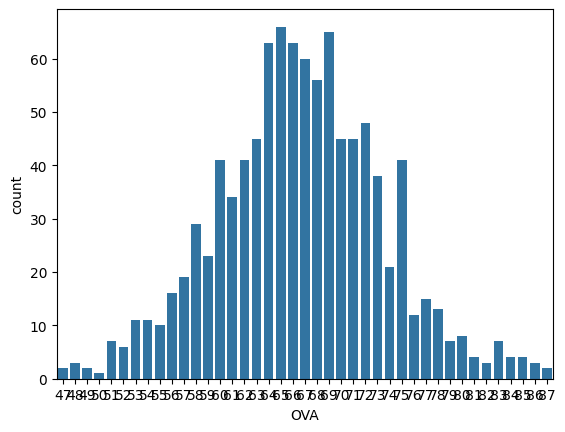

In [ ]:
sns.countplot(x = 'OVA', data = df)

### Conclusiones

Se puede observar que el dataset tiene un total de 995 filas y 58 columnas. De estas, ninguna fila o registro tiene valores nulos. Adicionalmente, se puede ver que el OVA (nuestro objetivo) se encuentra distribuido de forma normal y no se encuentran valores fuera del rango esperado.

In [ ]:
# Calcular la varianza de cada columna (excluyendo las columnas "Nationality" y "foot")
variances = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).var()

# Calcular la media de cada columna (excluyendo las columnas "Nationality" y "foot")
means = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).mean()

# Calcular la moda de cada columna (excluyendo las columnas "Nationality" y "foot")
modes = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Calcular la varianza, media y moda de la columna "Nationality" por separado
nationality_mode = df["Nationality"].mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Calcular la varianza, media y moda de la columna "foot" por separado

foot_mode = df["foot"].mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Imprimir los resultados
data = []
columnas_numericas = df.select_dtypes(include=[np.number])
for column in columnas_numericas:
      data.append([column, variances[column], means[column], modes[column]])

data.append(["Nationality", '','' ,nationality_mode])
data.append(["foot", '','' ,foot_mode])

# Mostrar la tabla con tabulate
table = tabulate(data, headers=["Columna", "Varianza", "Media", "Moda"], tablefmt="grid")
print(table)
num_columnas = columnas_numericas.shape[1]
print("Número de filas en columnas_no_numericas:", num_columnas)

+------------------+--------------------+--------------------+----------+
| Columna          | Varianza           | Media              | Moda     |
+==================+====================+====================+==========+
| Age              | 23.99743172023075  | 25.153923541247487 | 20.0     |
+------------------+--------------------+--------------------+----------+
| OVA              | 46.79837028211566  | 66.64084507042253  | 65.0     |
+------------------+--------------------+--------------------+----------+
| BOV              | 43.700069500588626 | 67.59154929577464  | 66.0     |
+------------------+--------------------+--------------------+----------+
| POT              | 32.50666942237514  | 72.25150905432595  | 73.0     |
+------------------+--------------------+--------------------+----------+
| Height           | 50.48623647180161  | 180.9864989939638  | 182.88   |
+------------------+--------------------+--------------------+----------+
| Weight           | 55.38386207732203

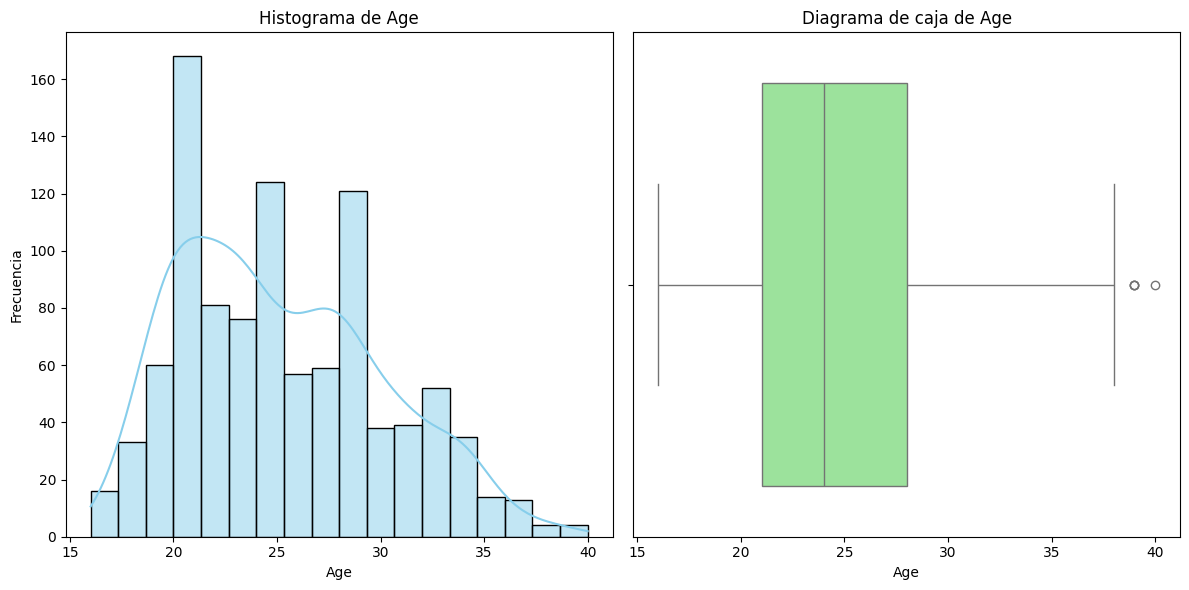

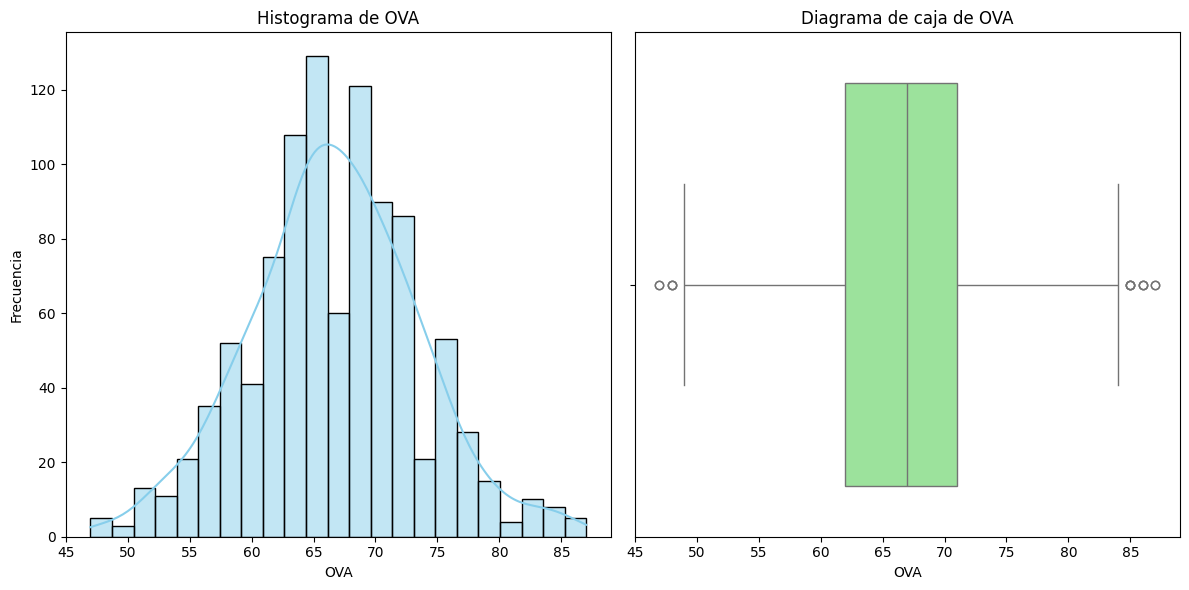

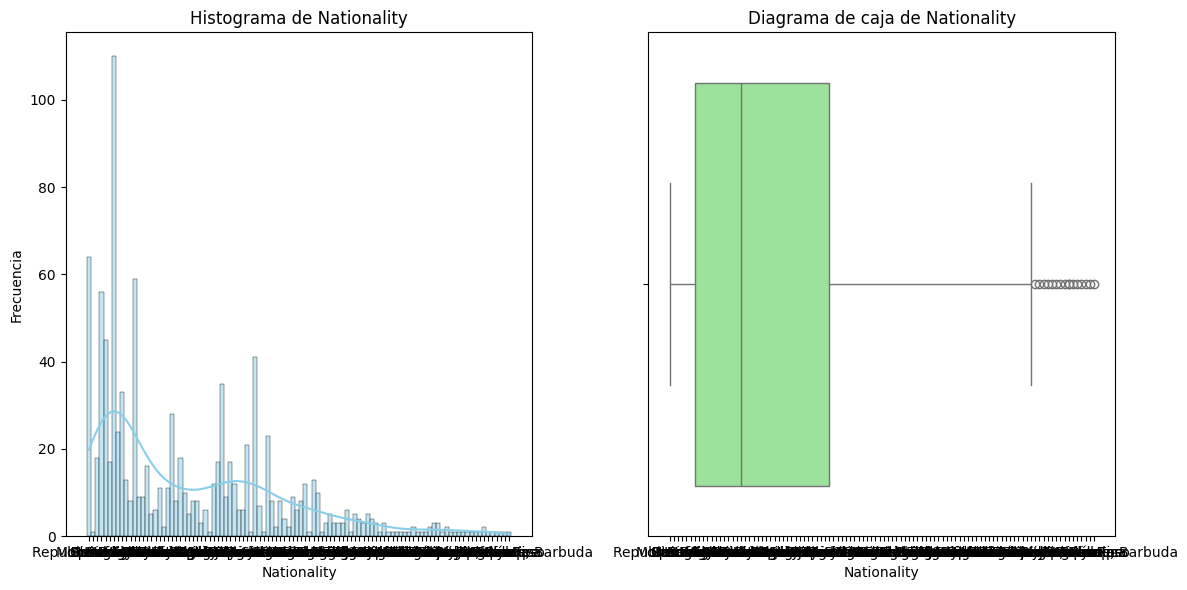

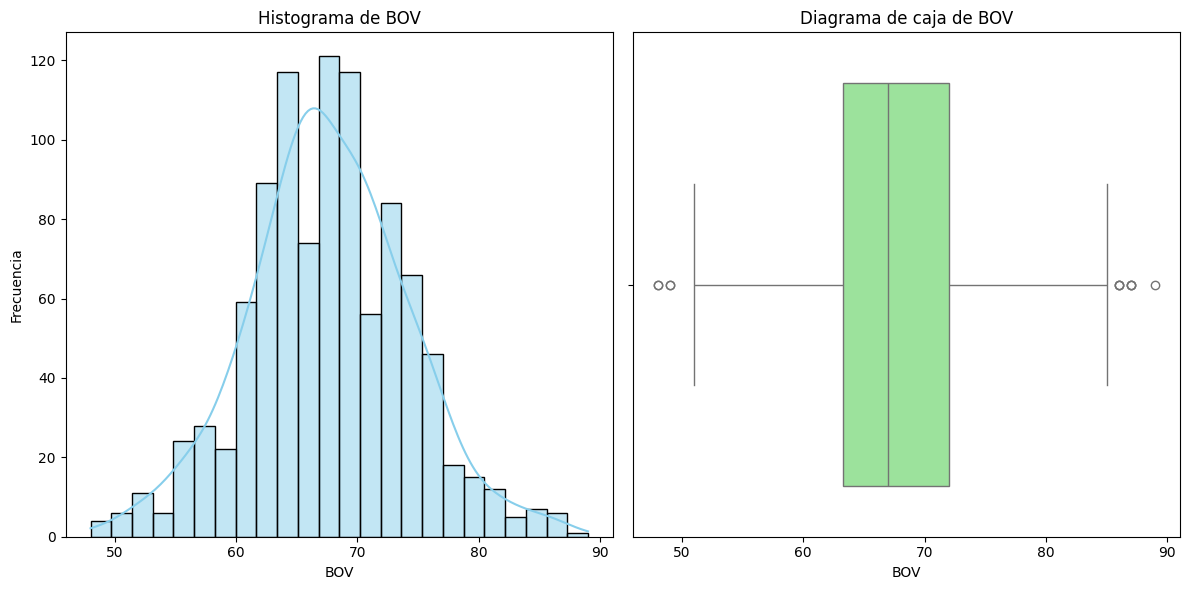

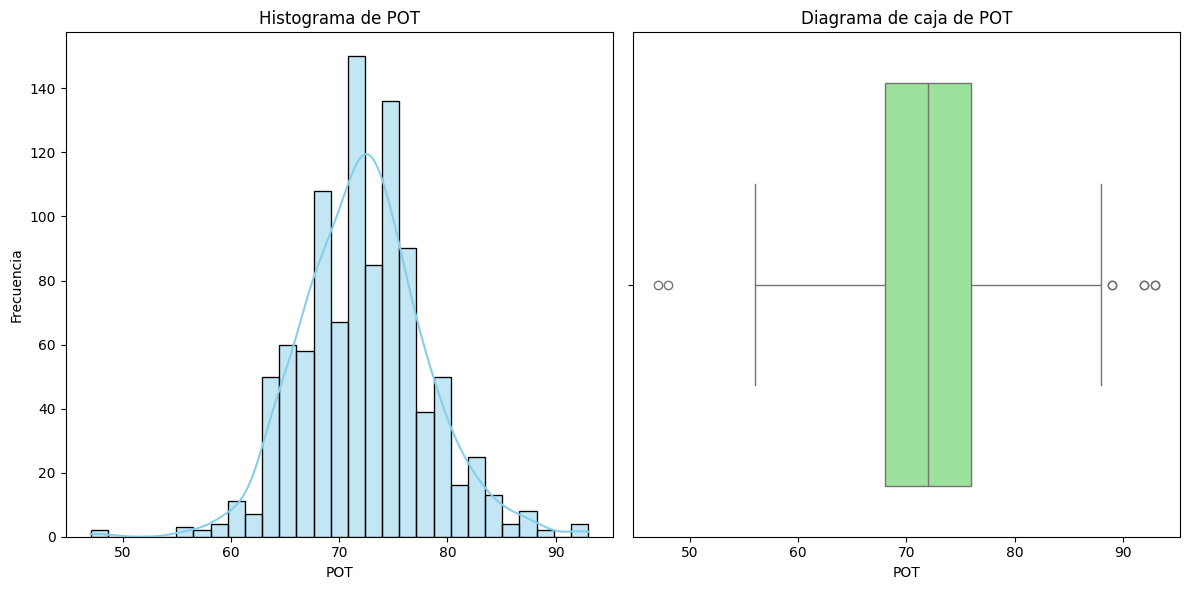

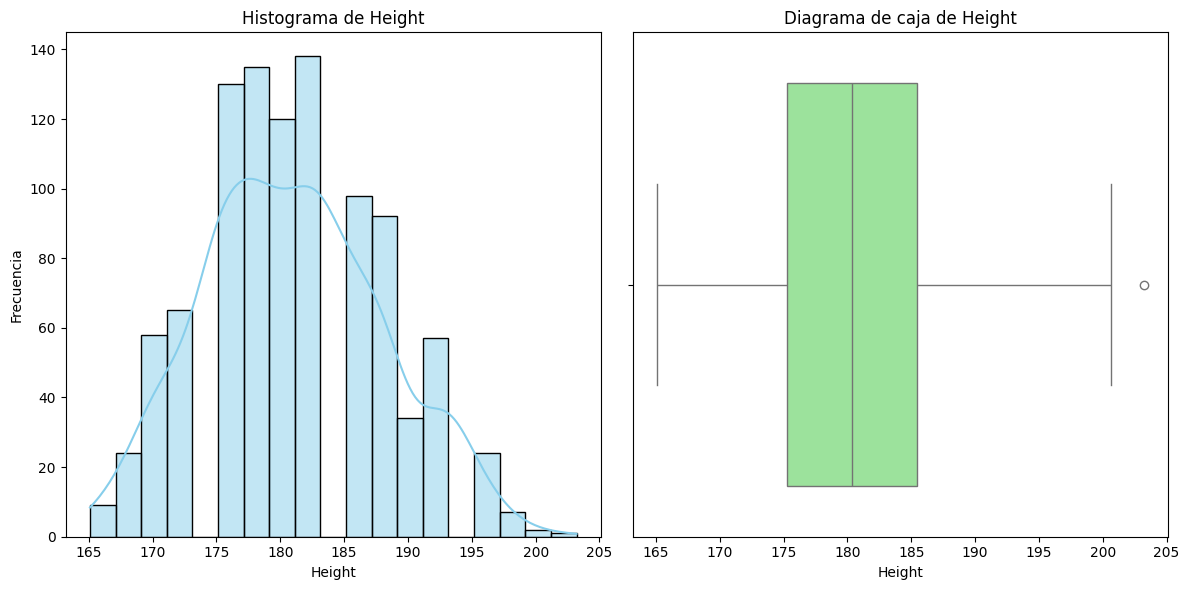

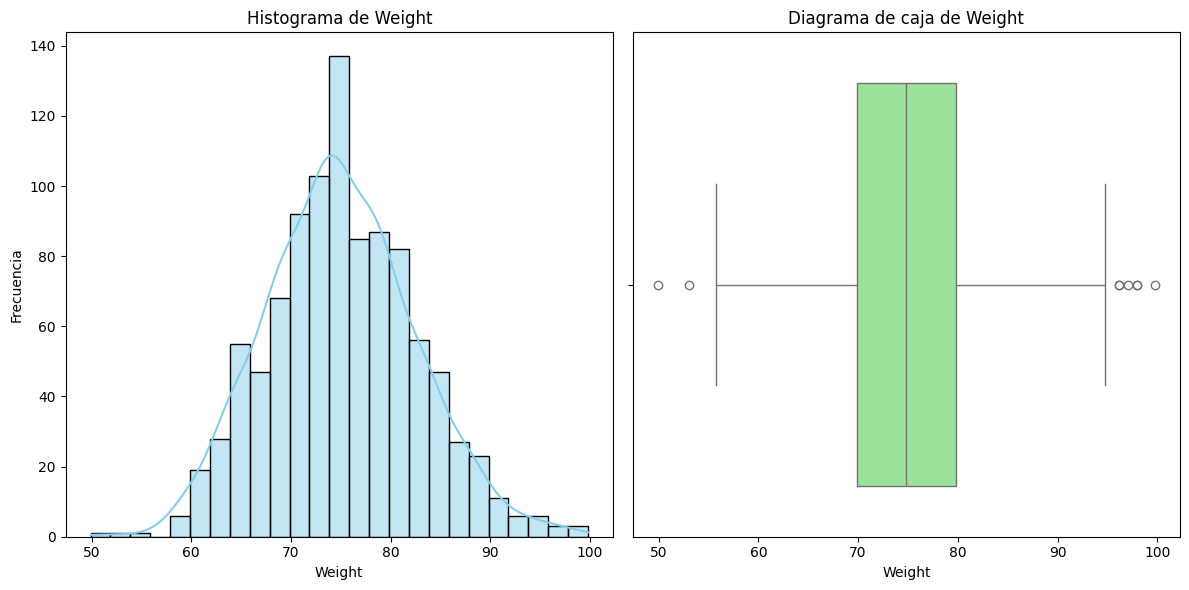

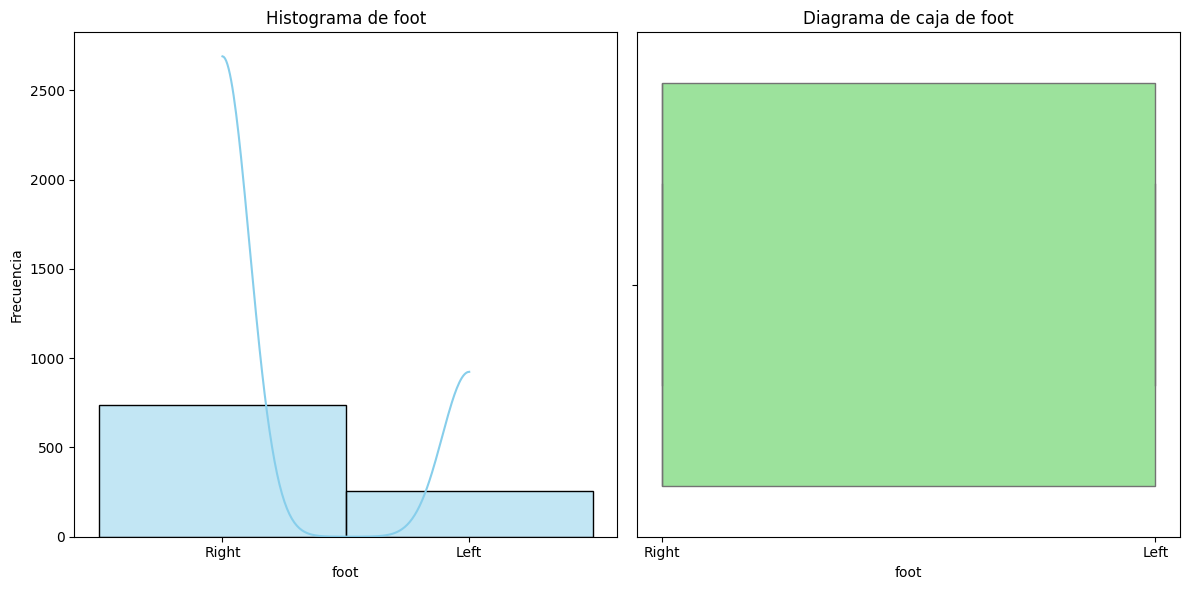

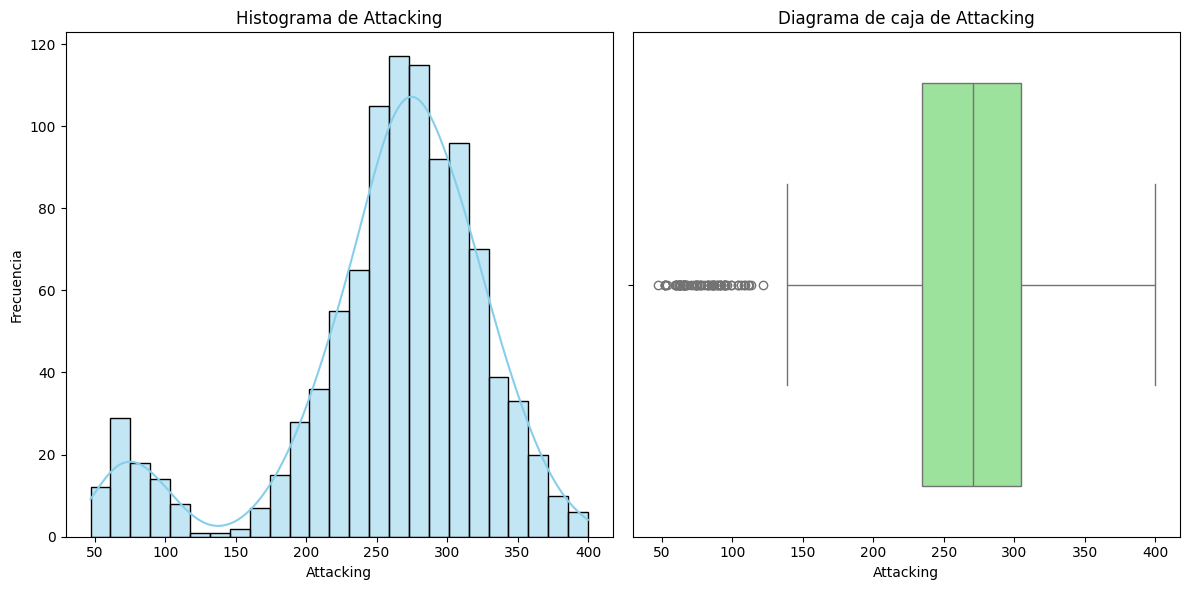

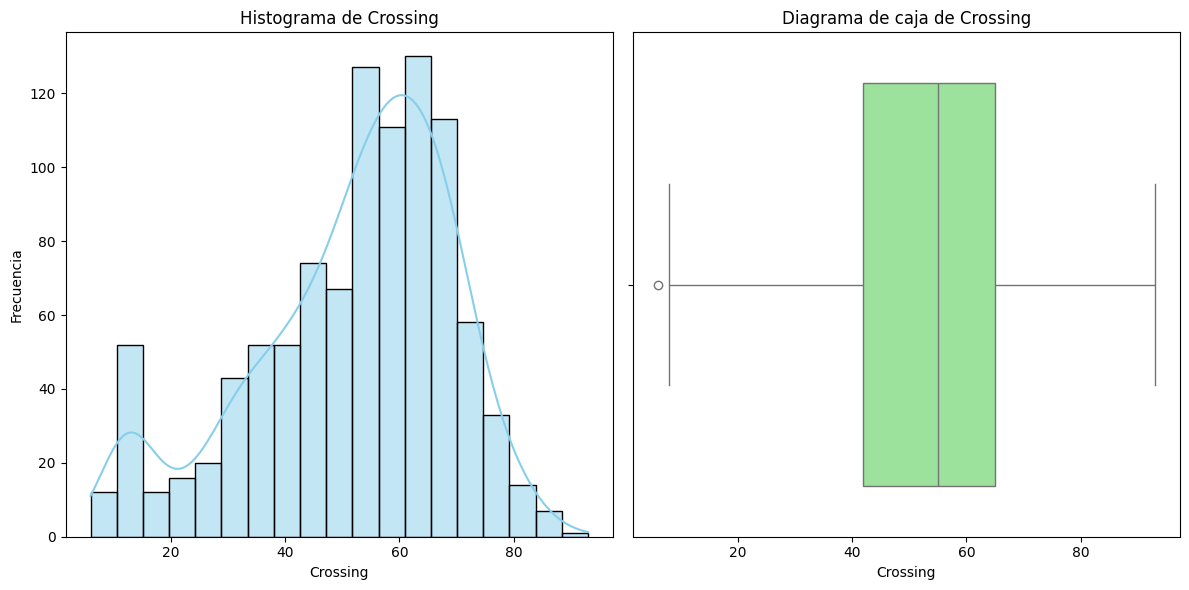

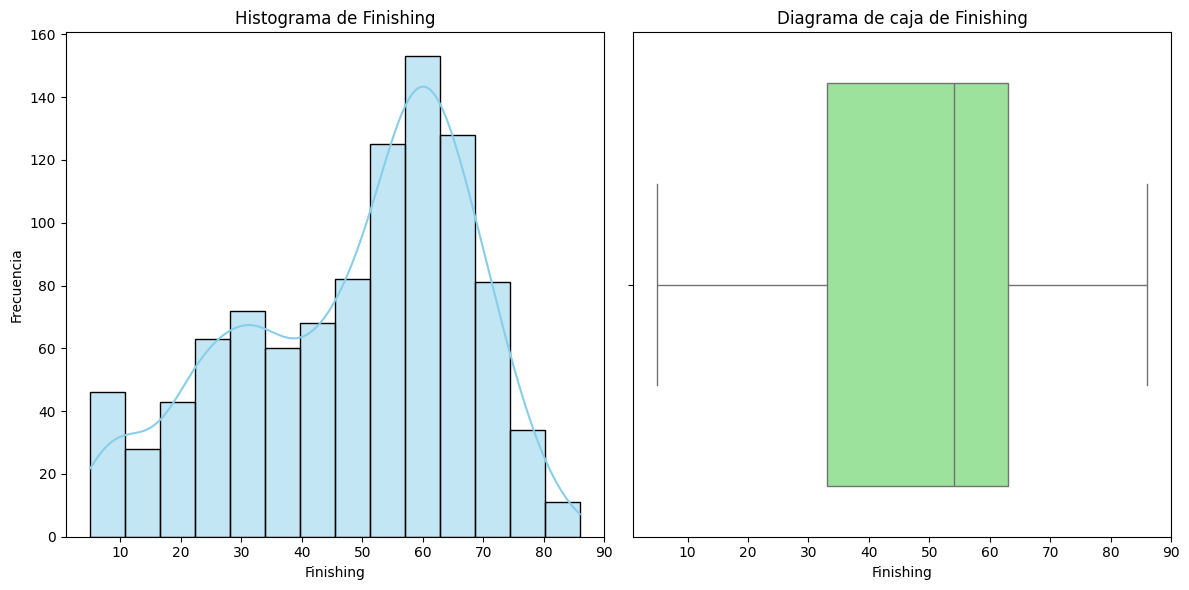

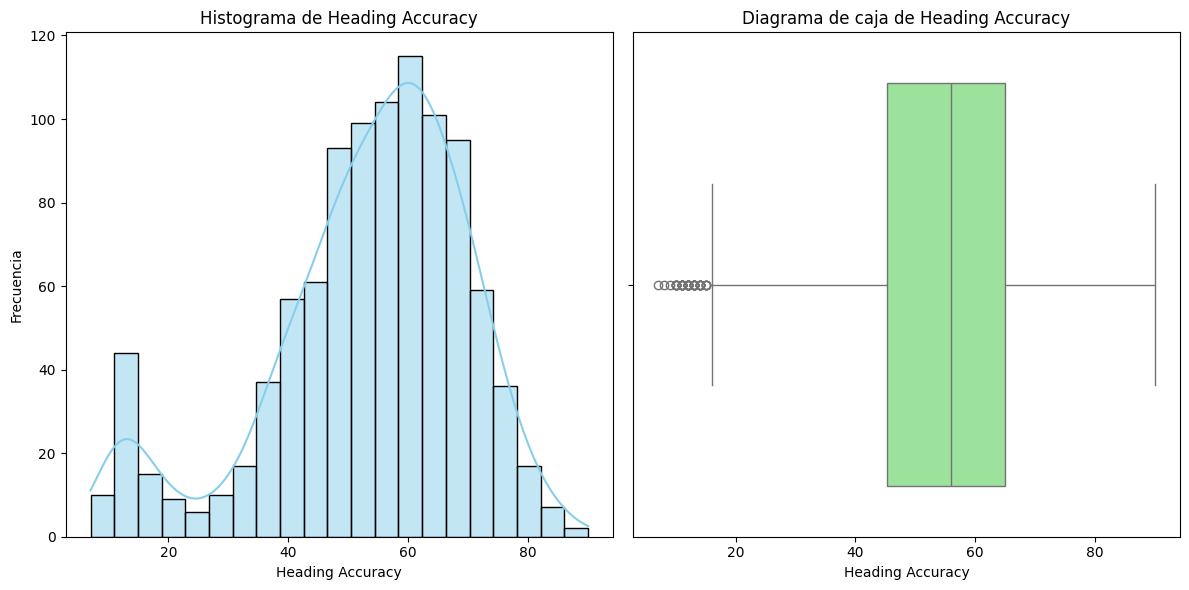

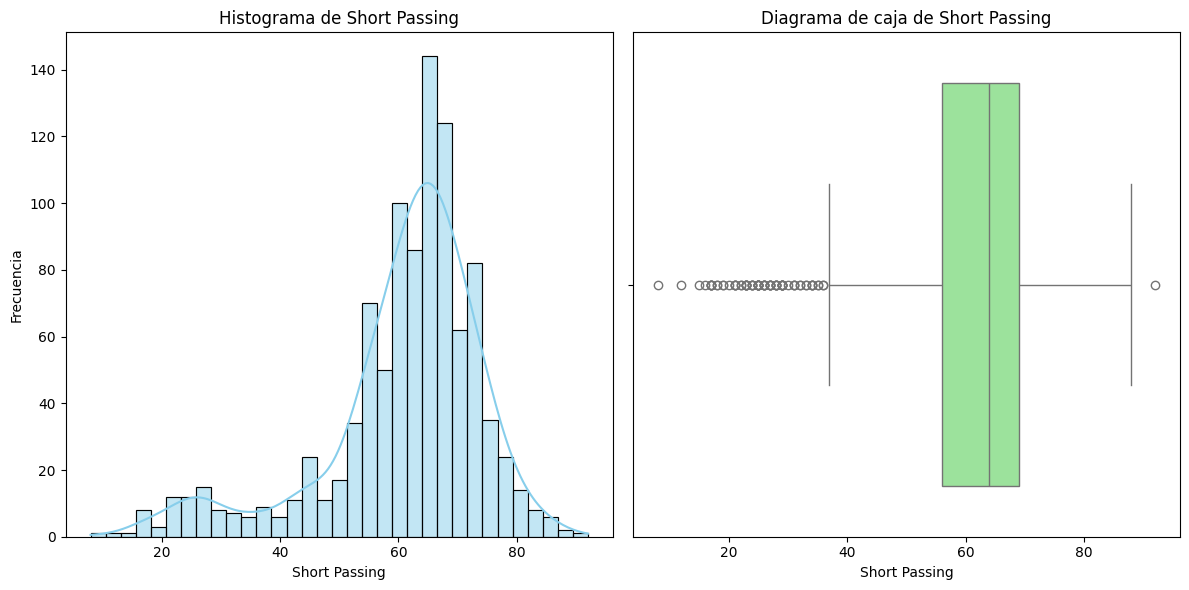

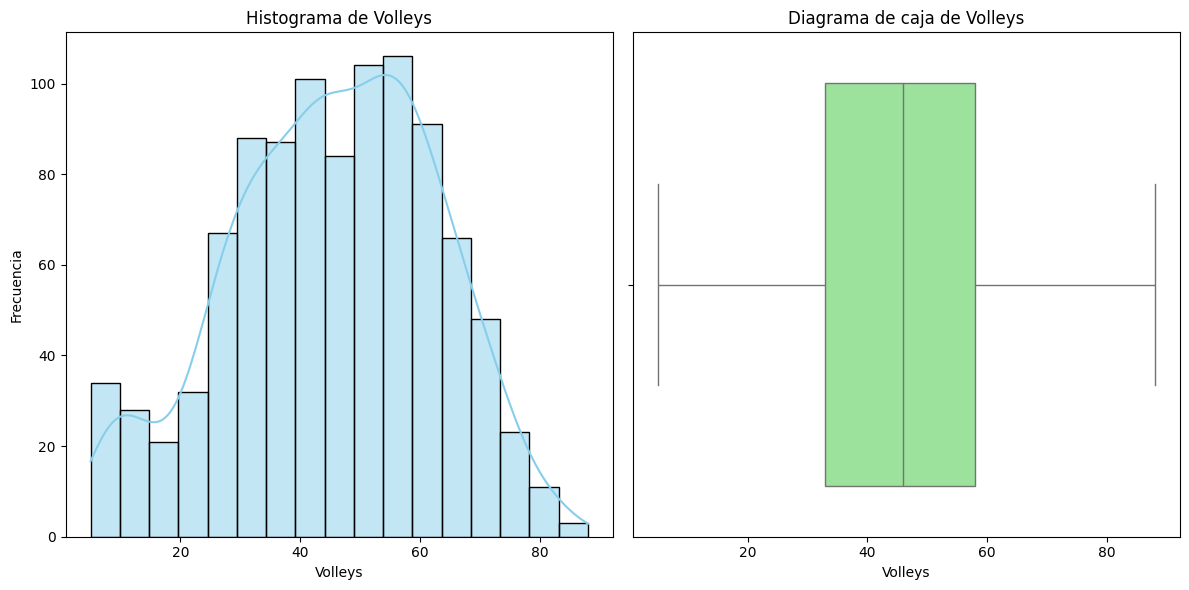

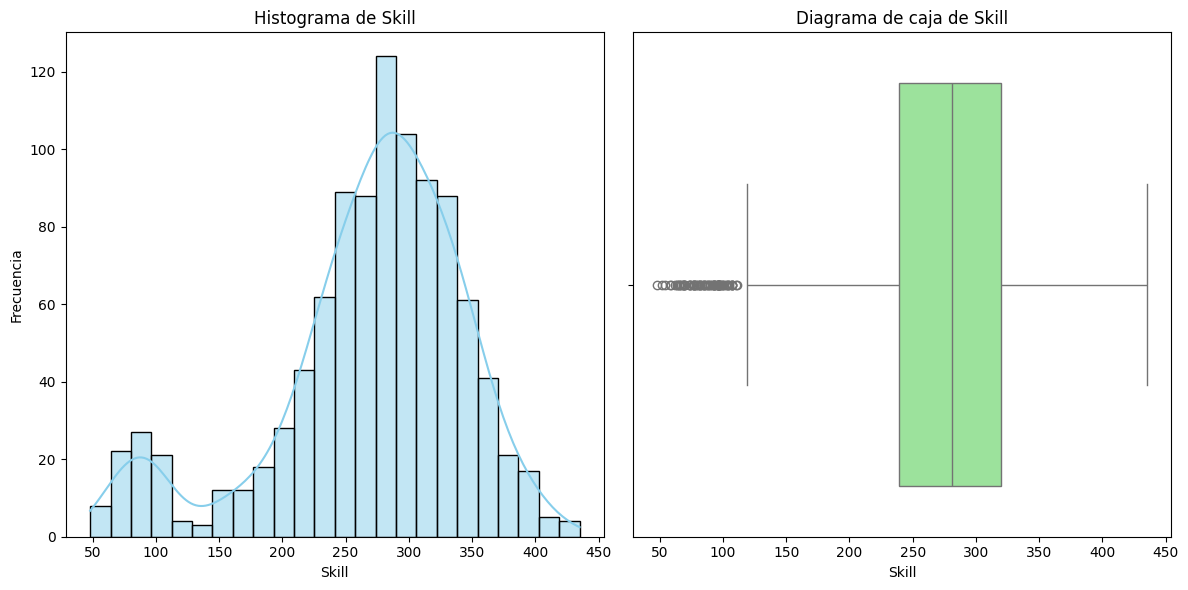

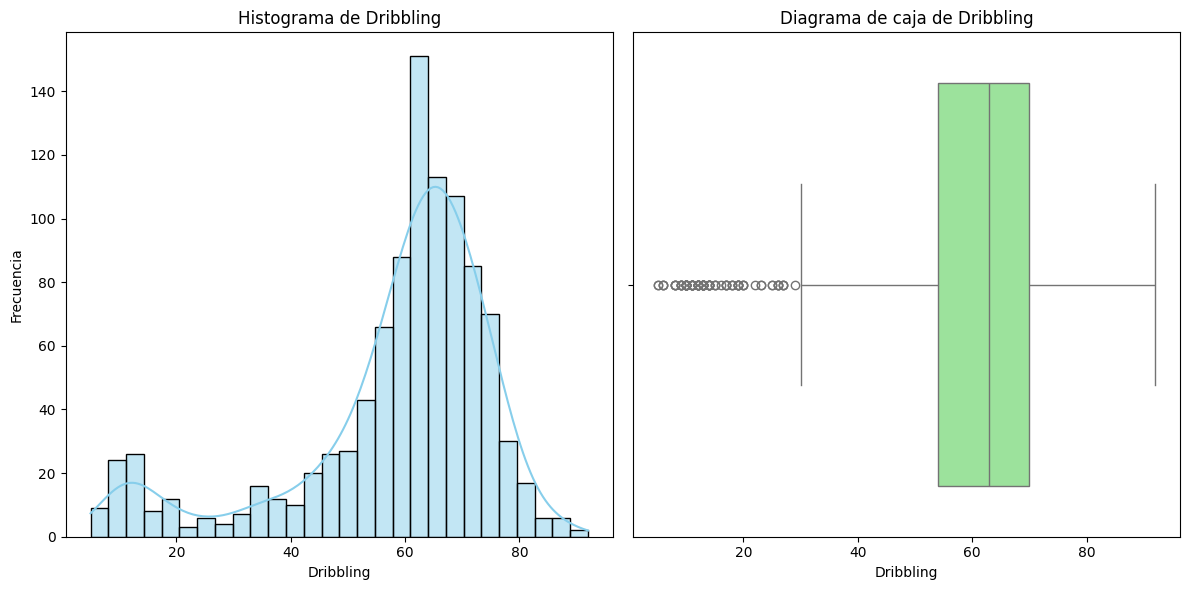

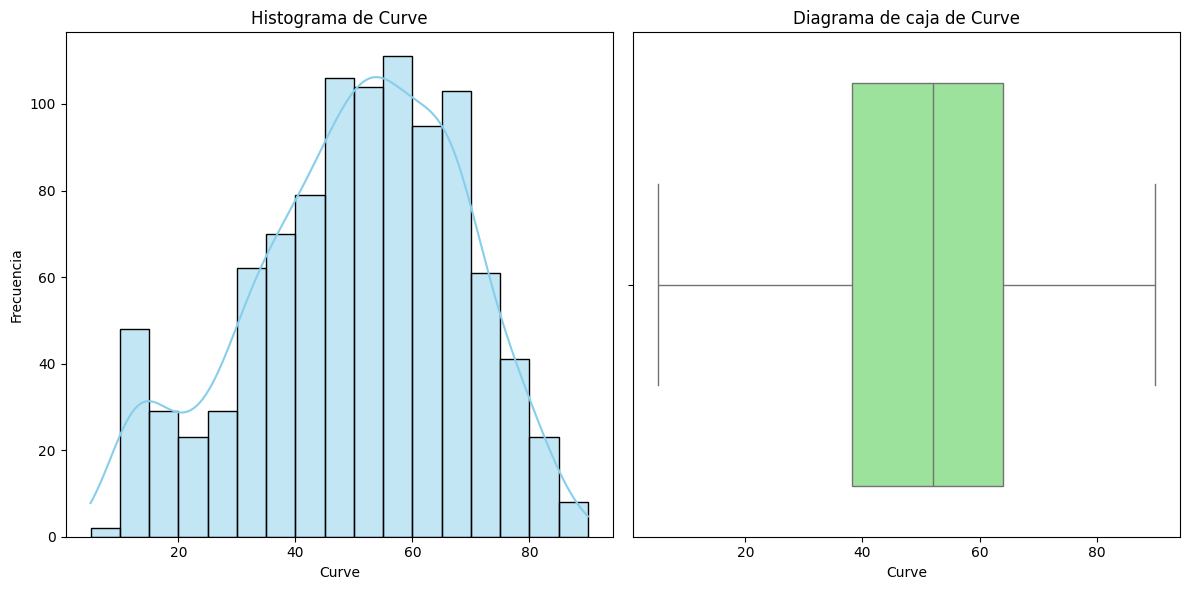

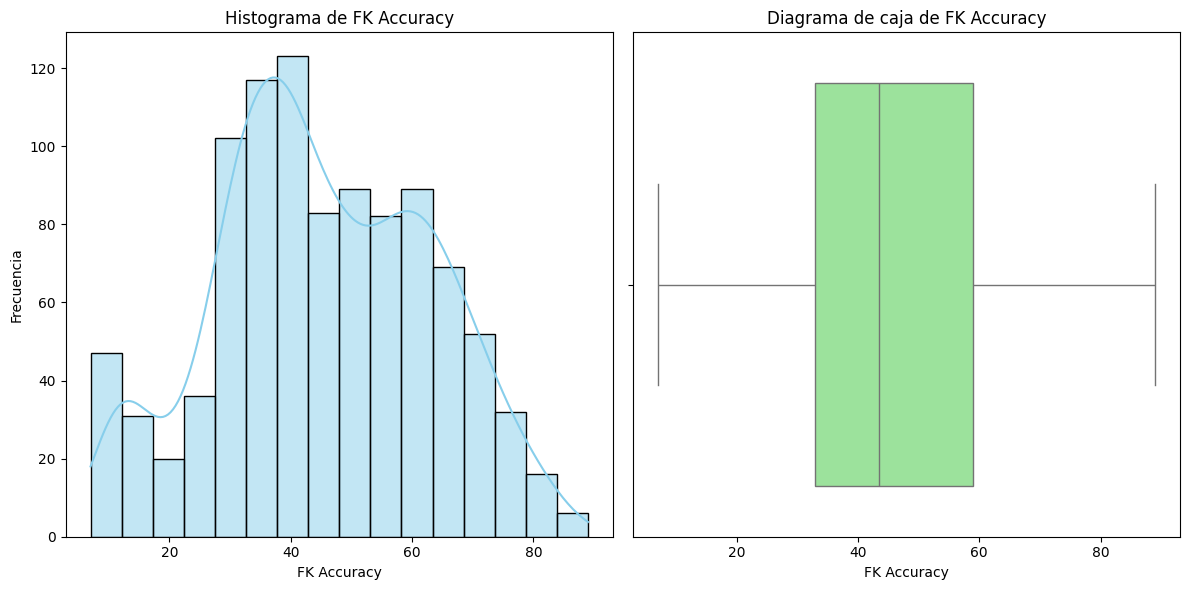

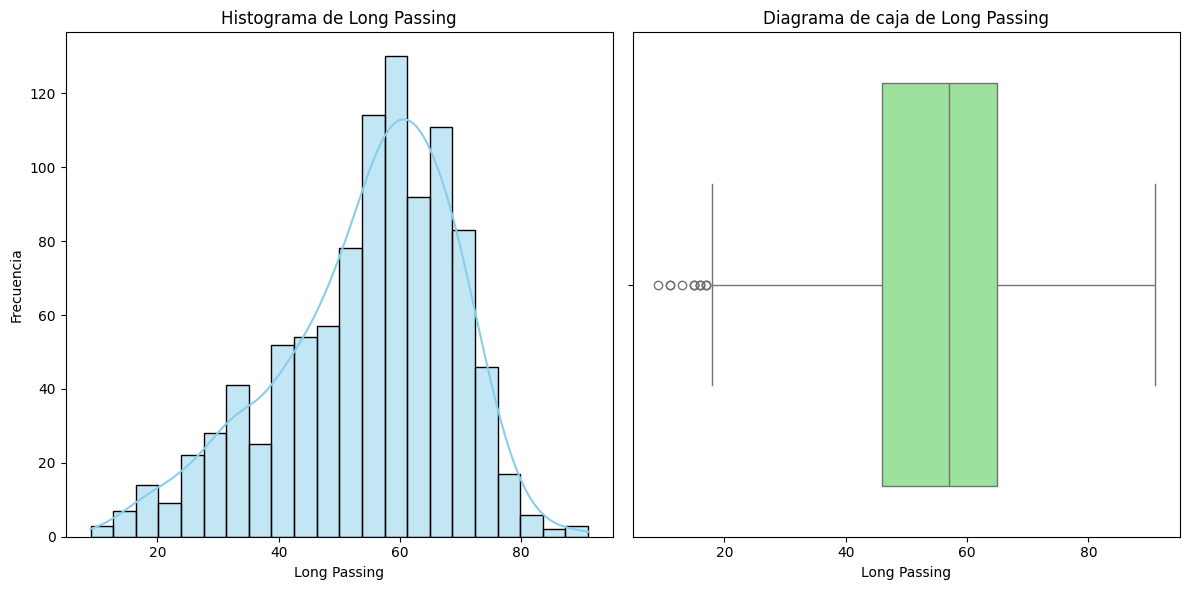

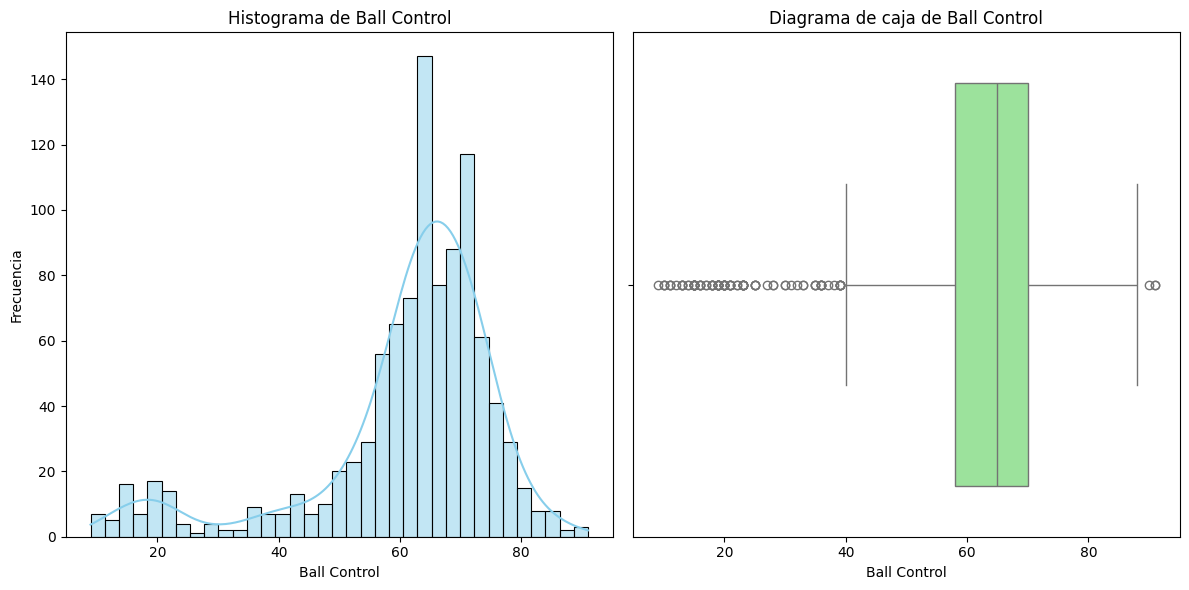

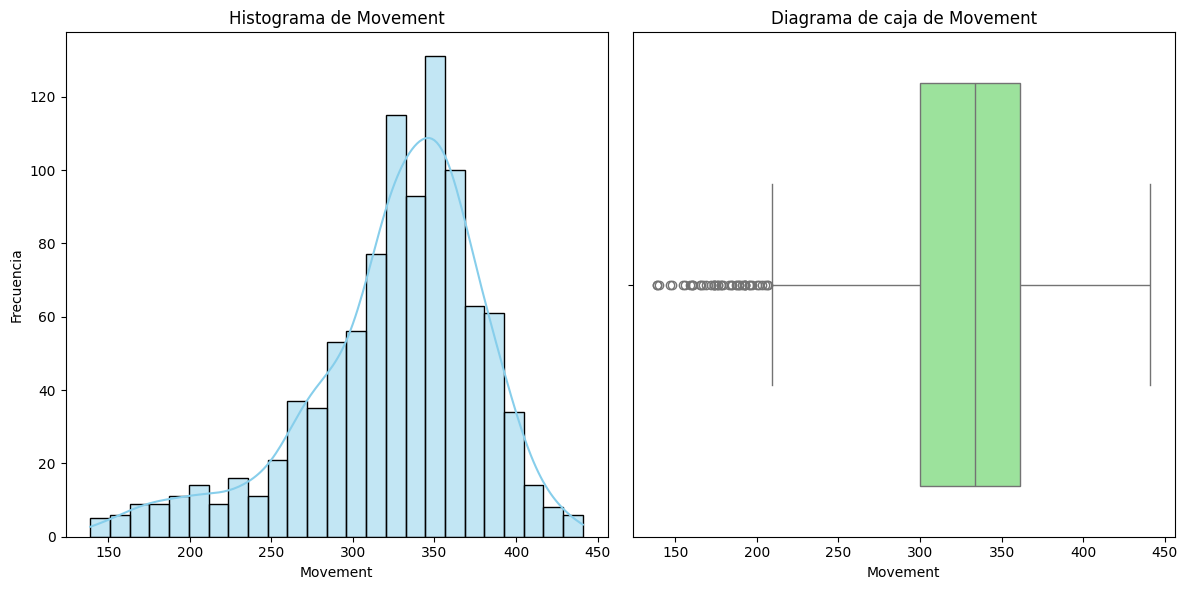

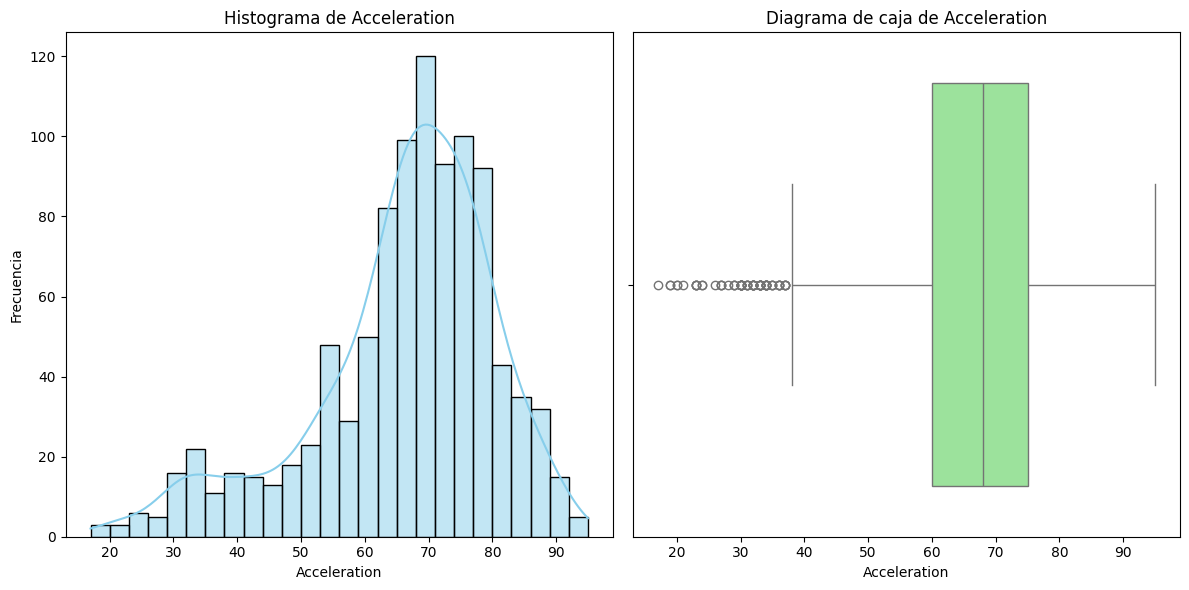

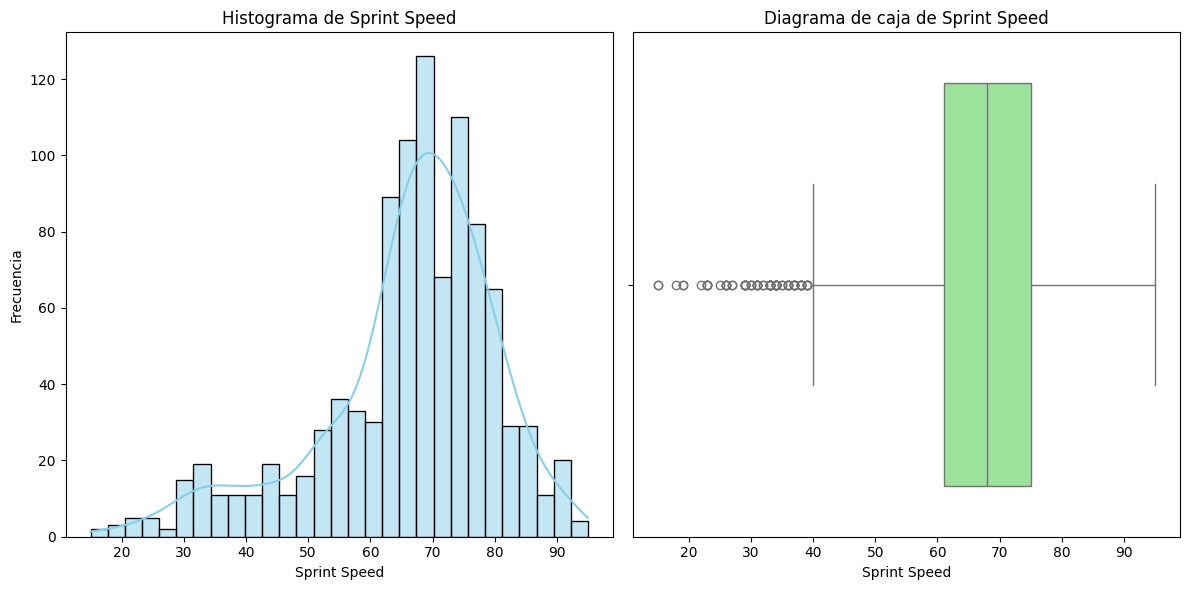

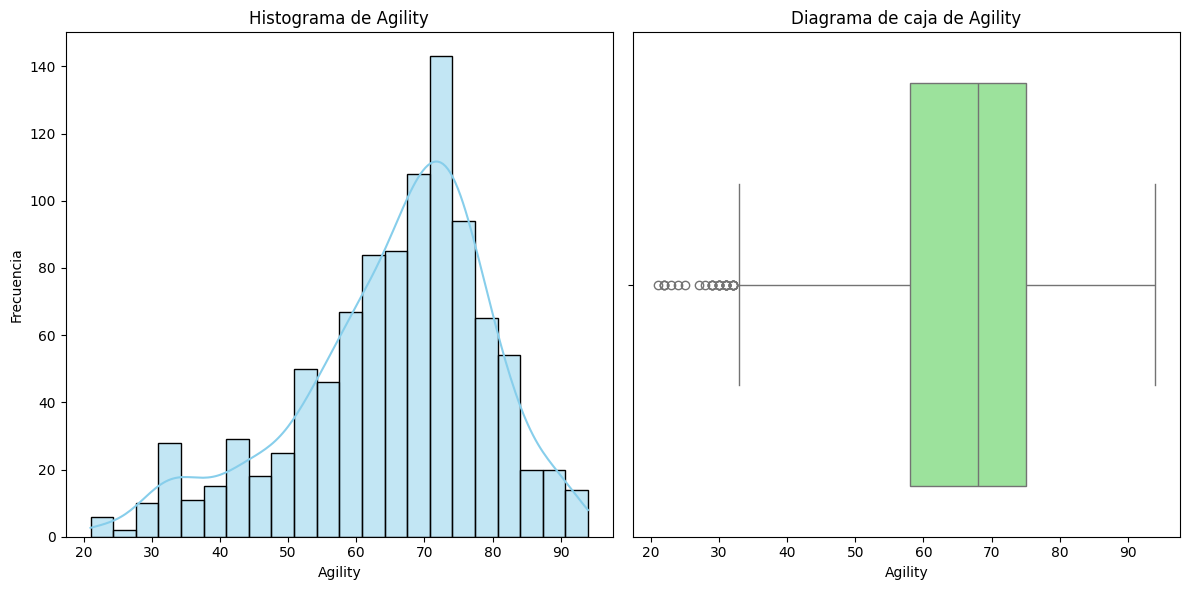

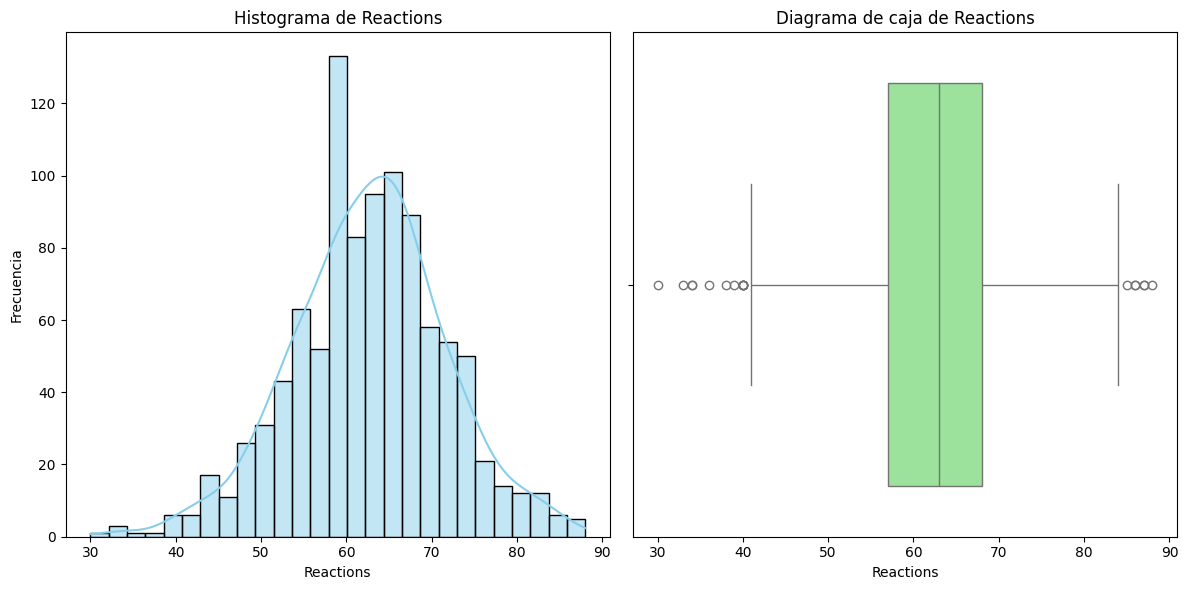

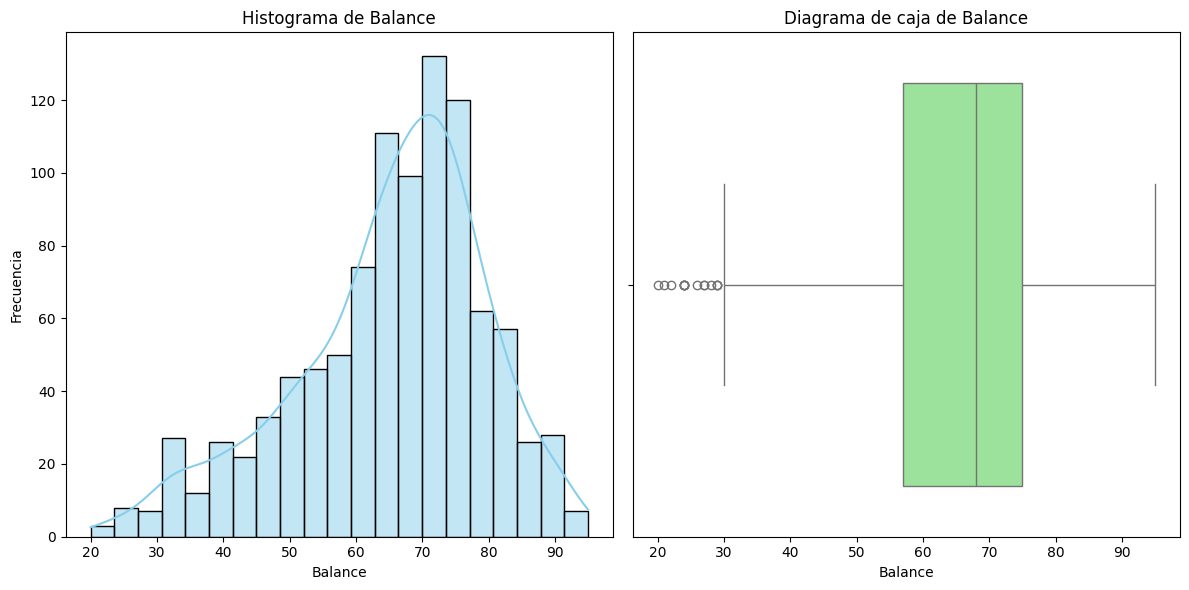

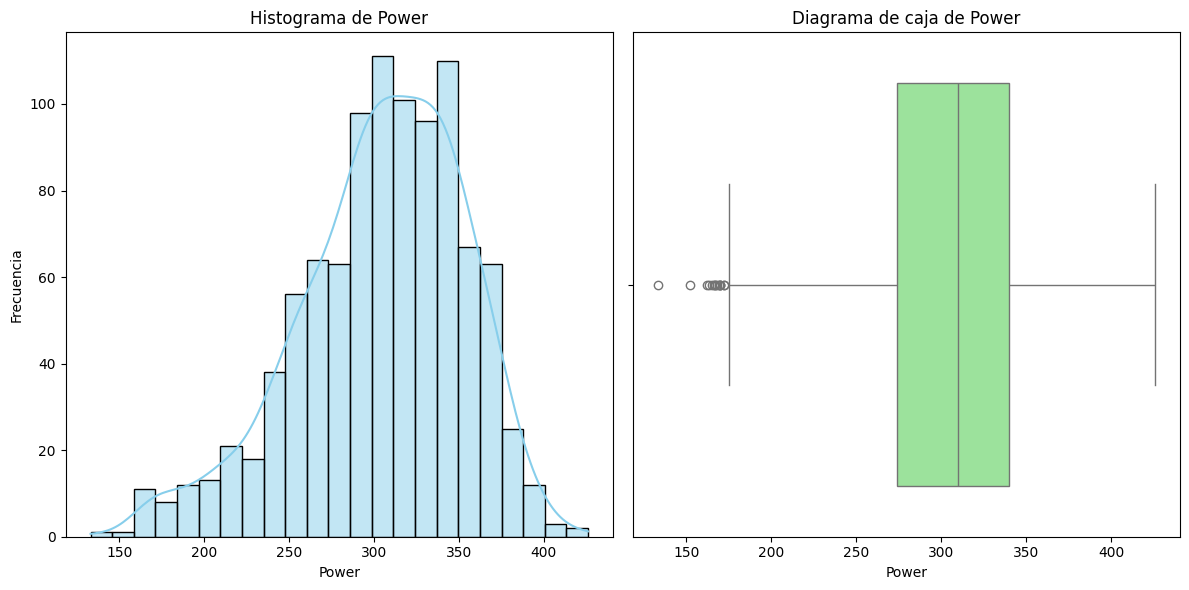

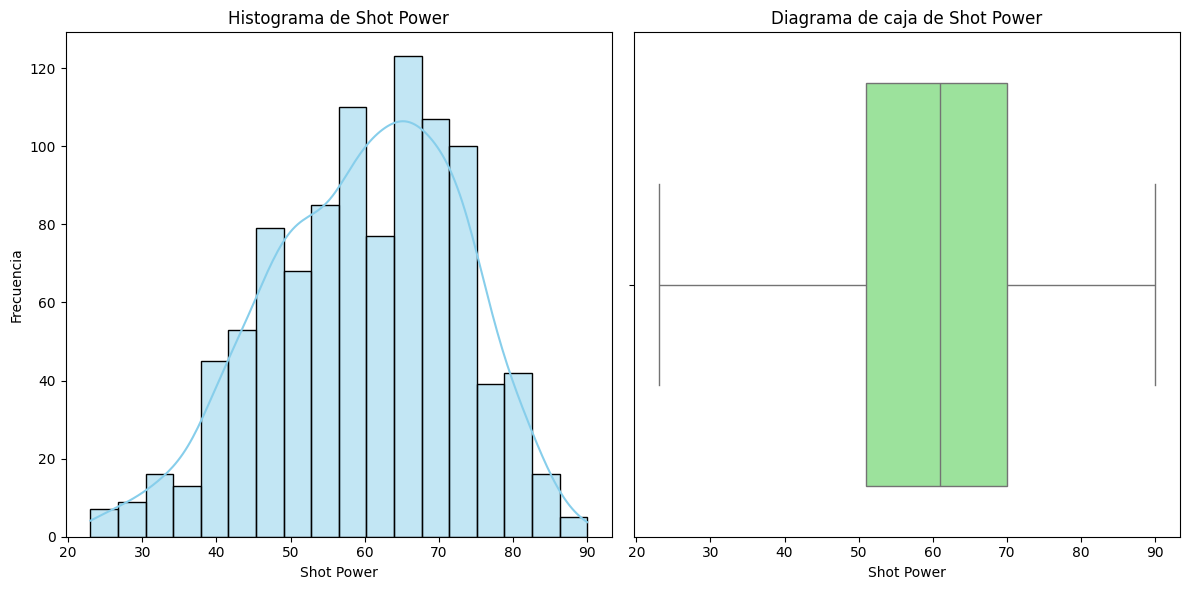

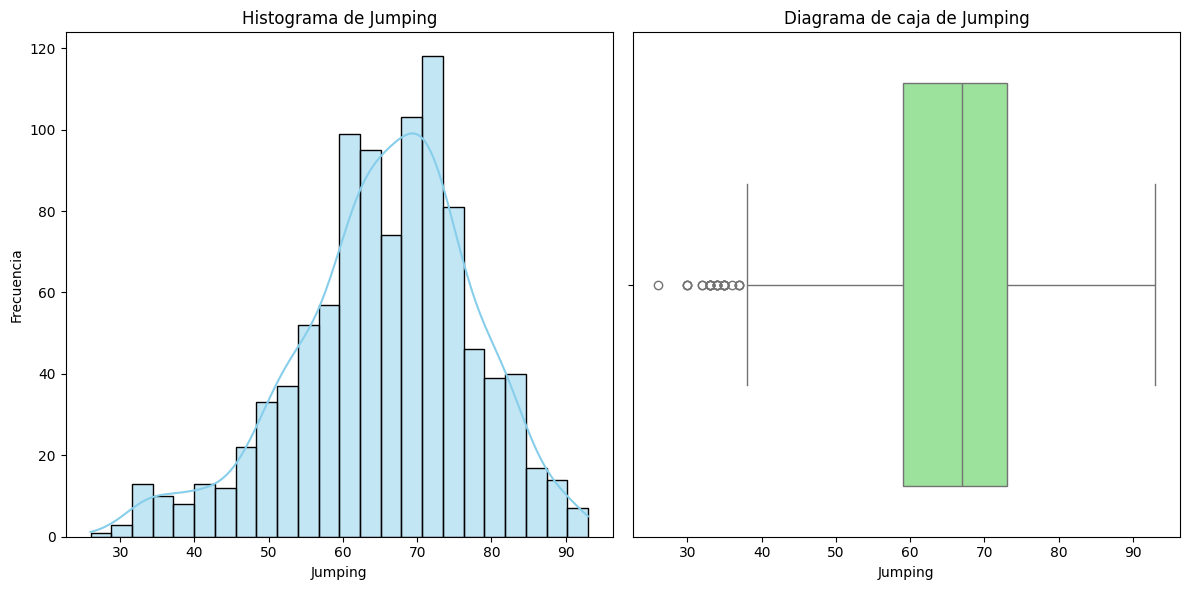

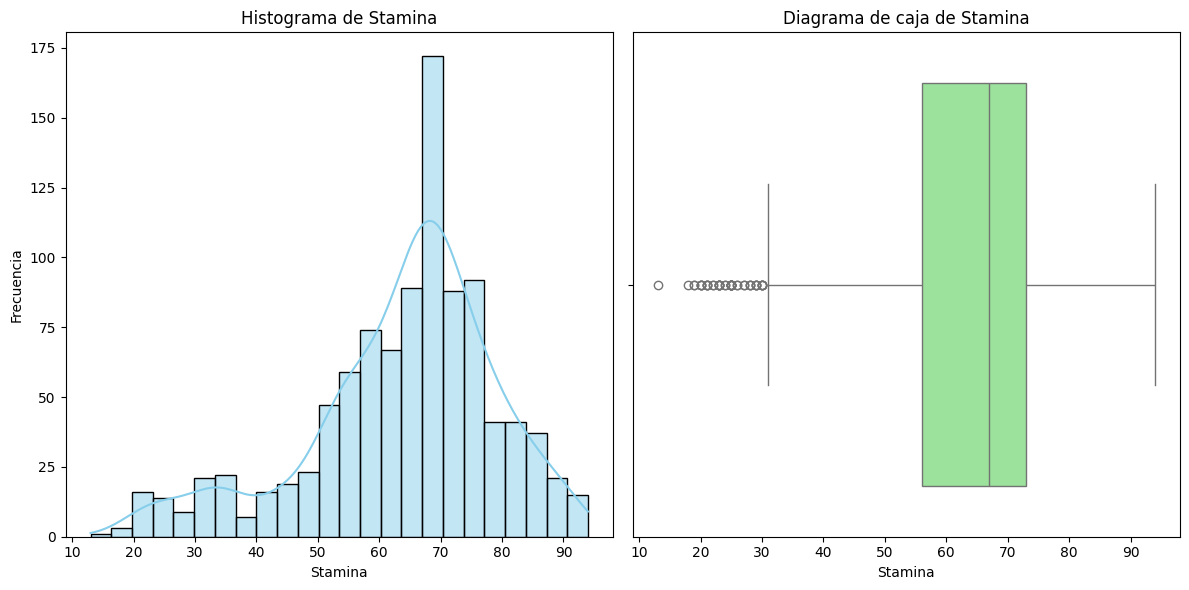

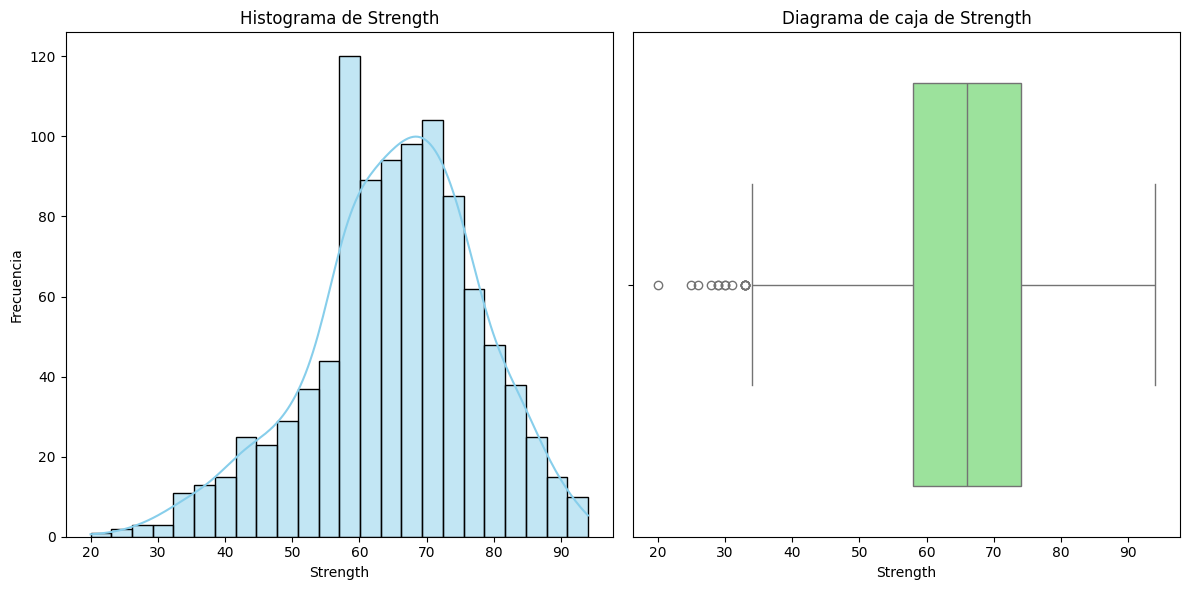

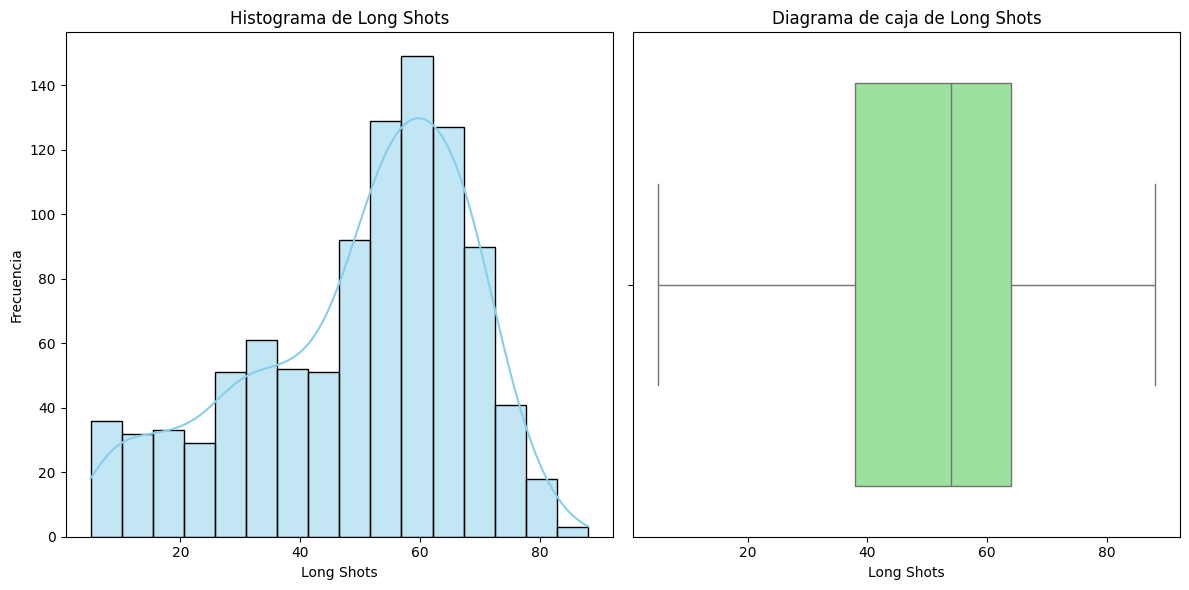

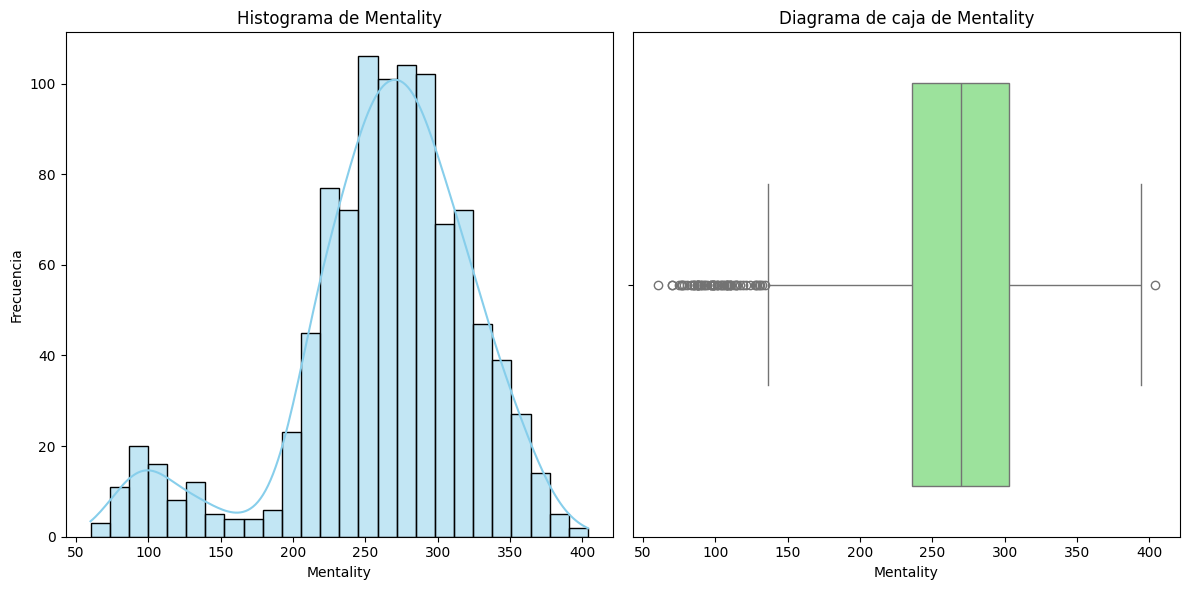

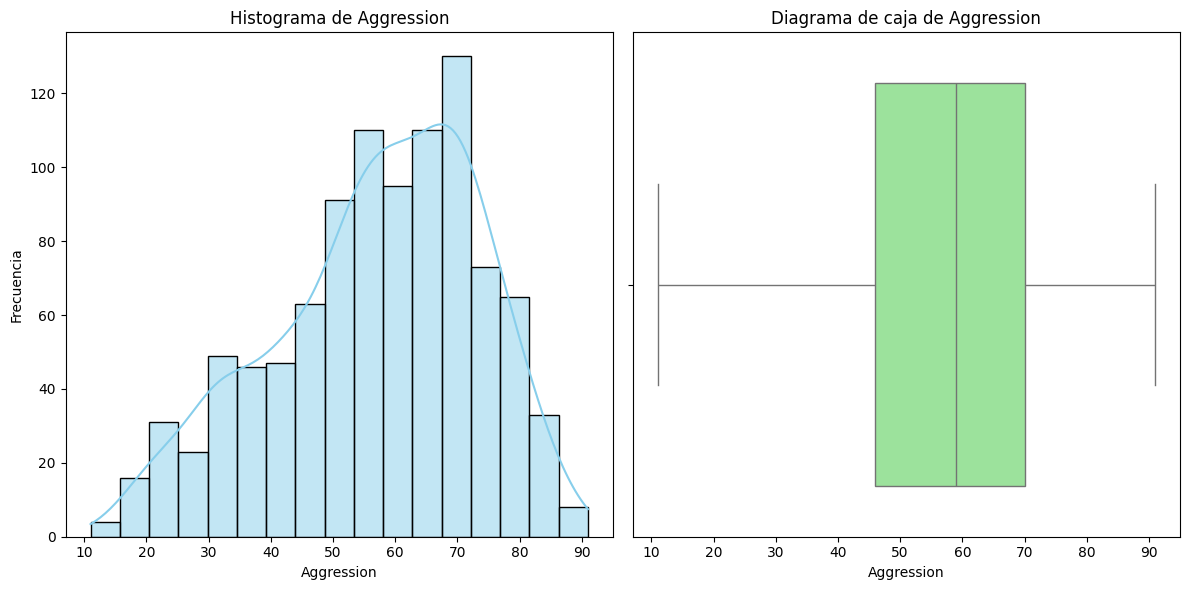

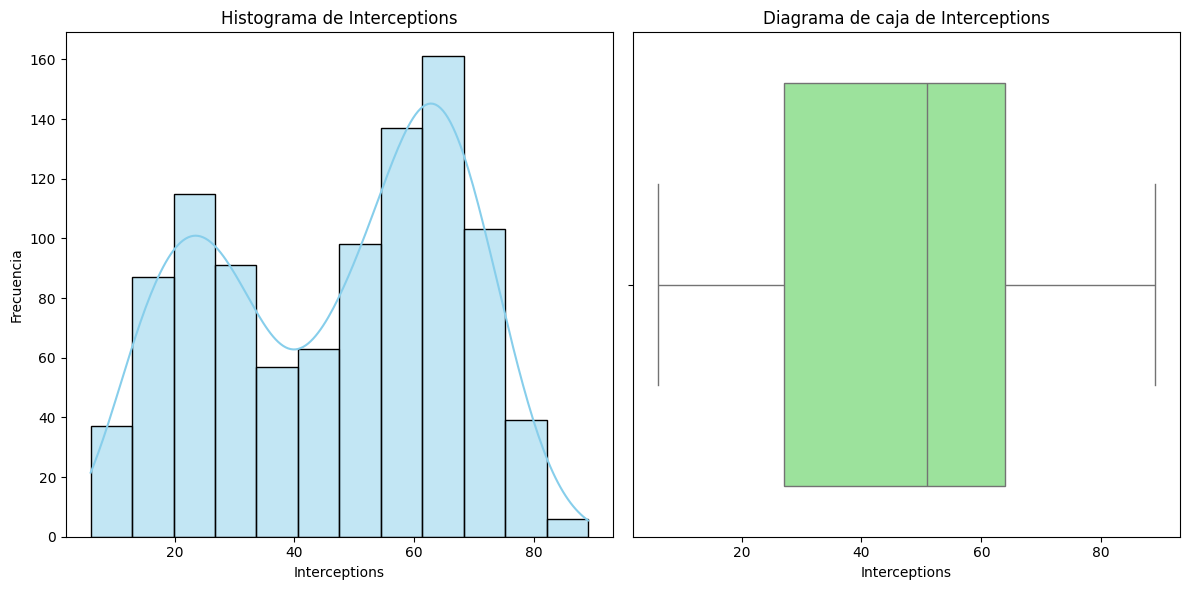

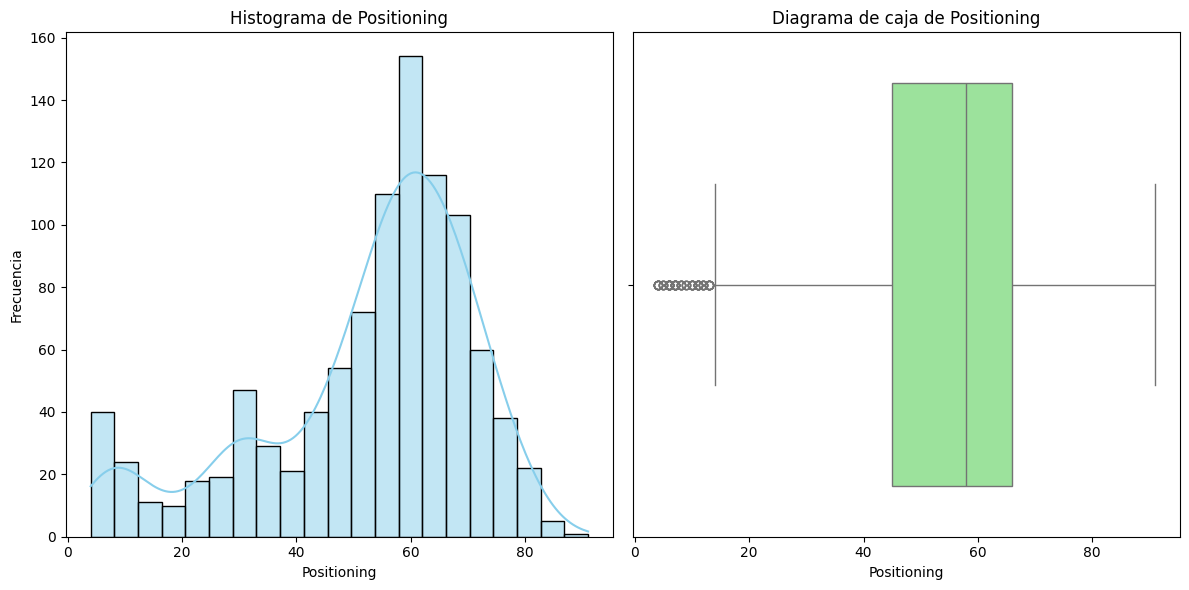

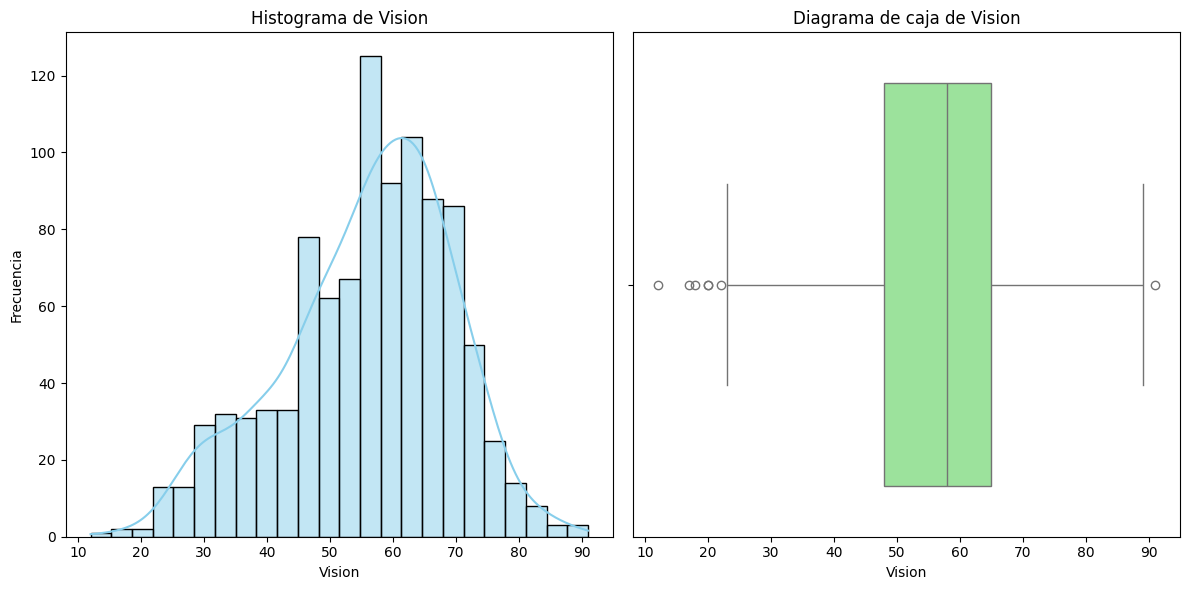

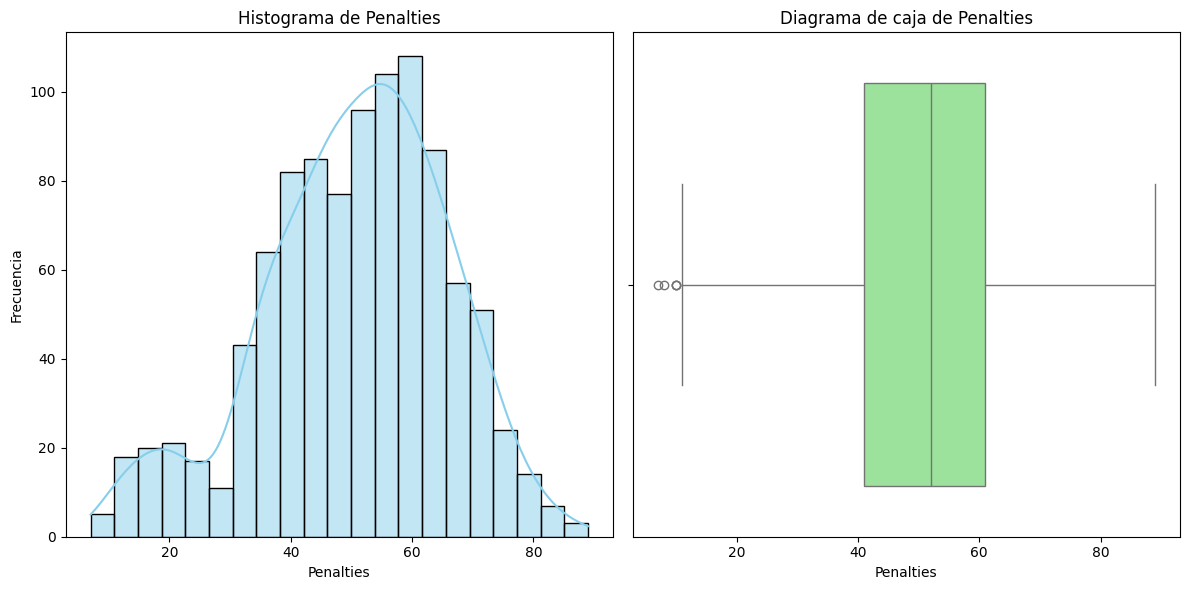

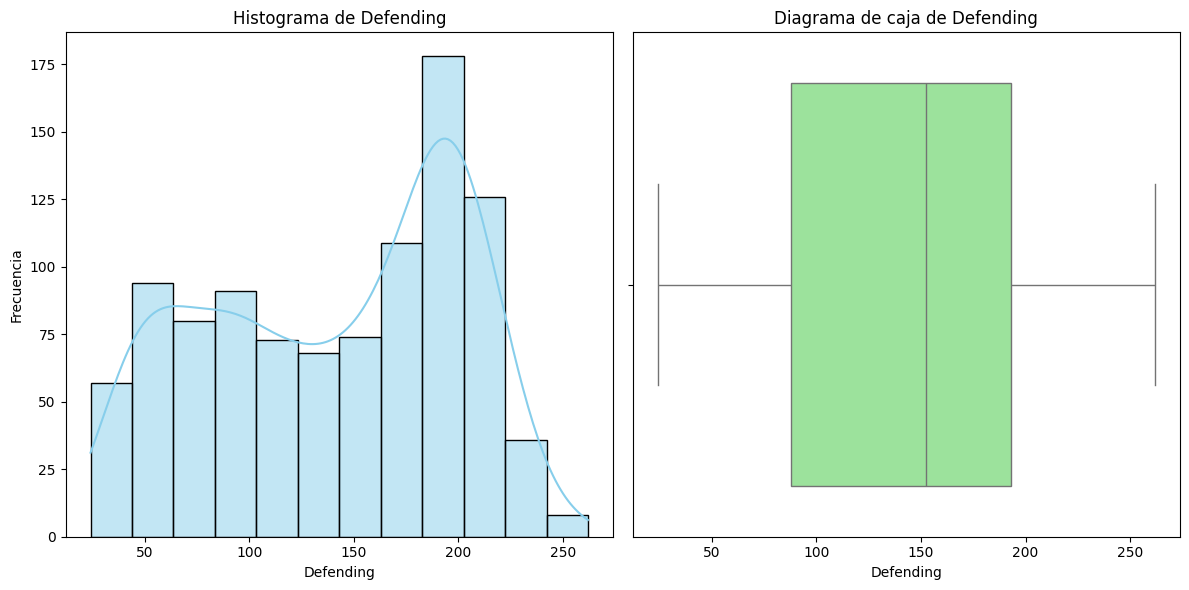

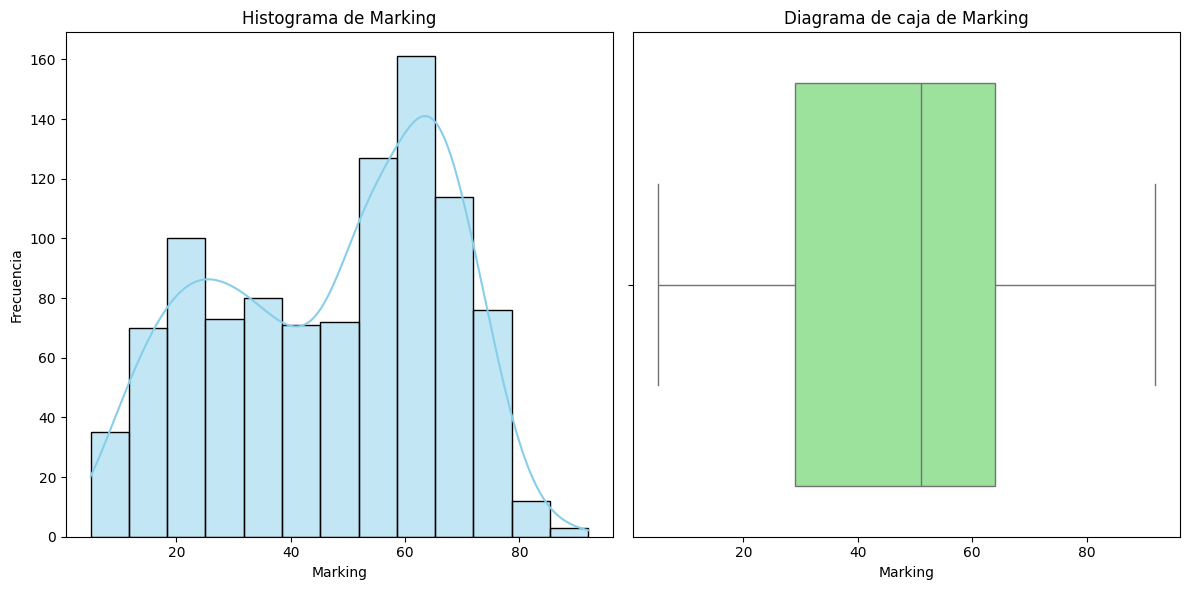

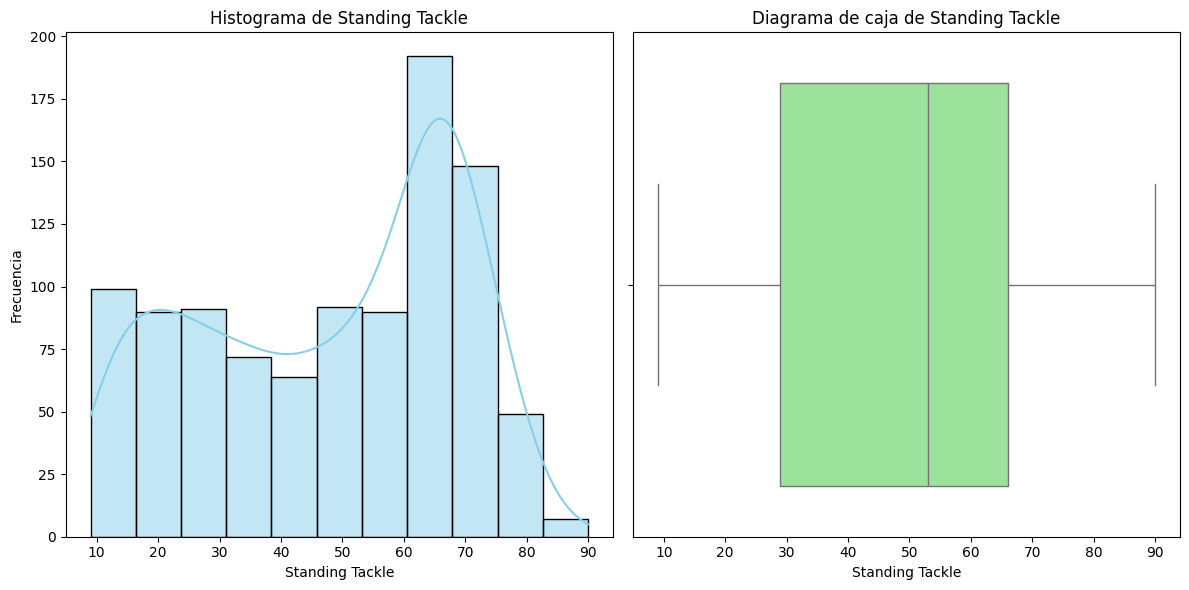

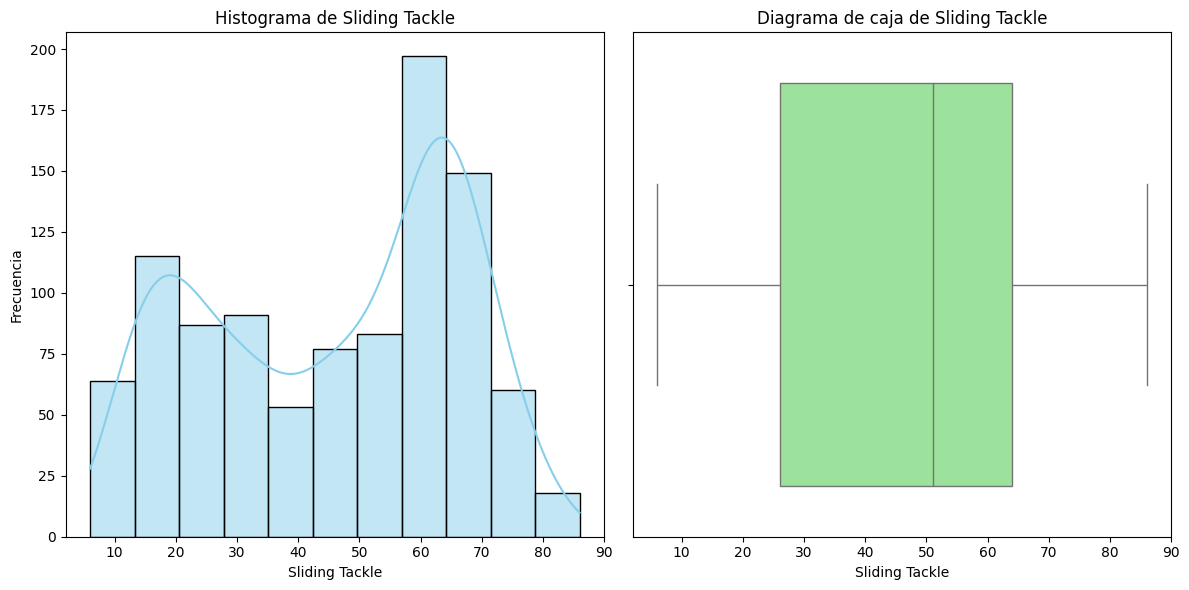

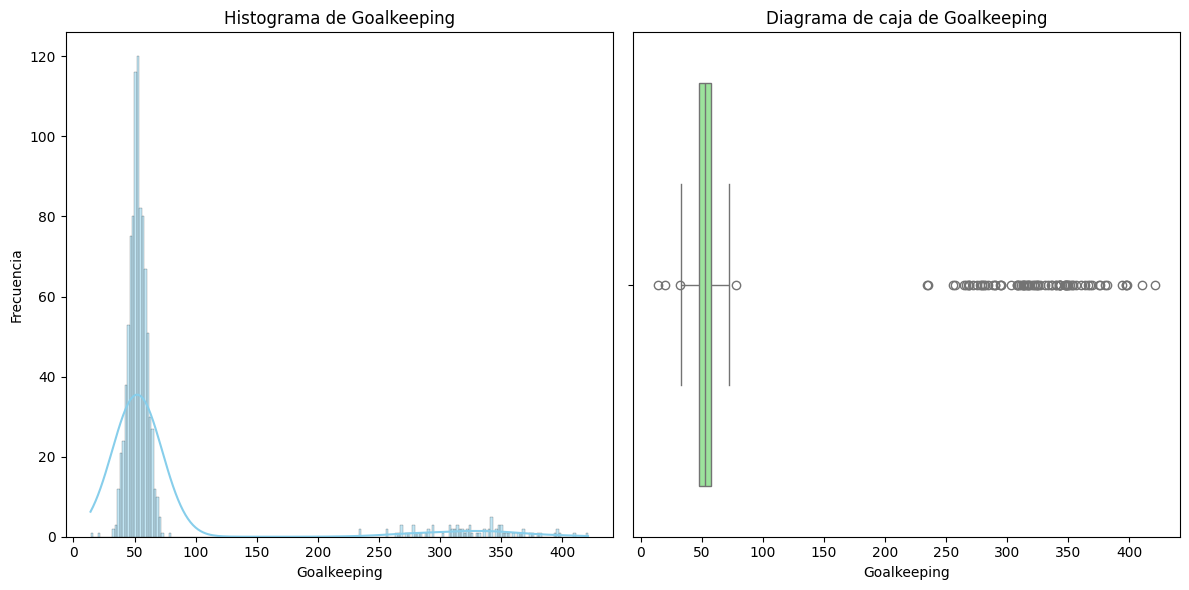

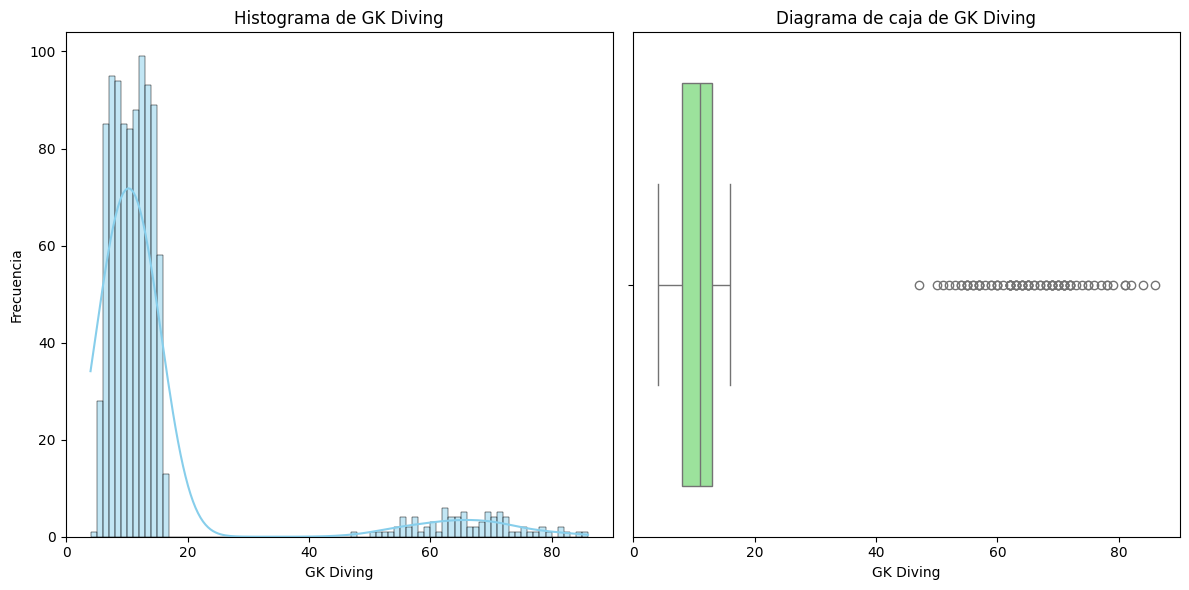

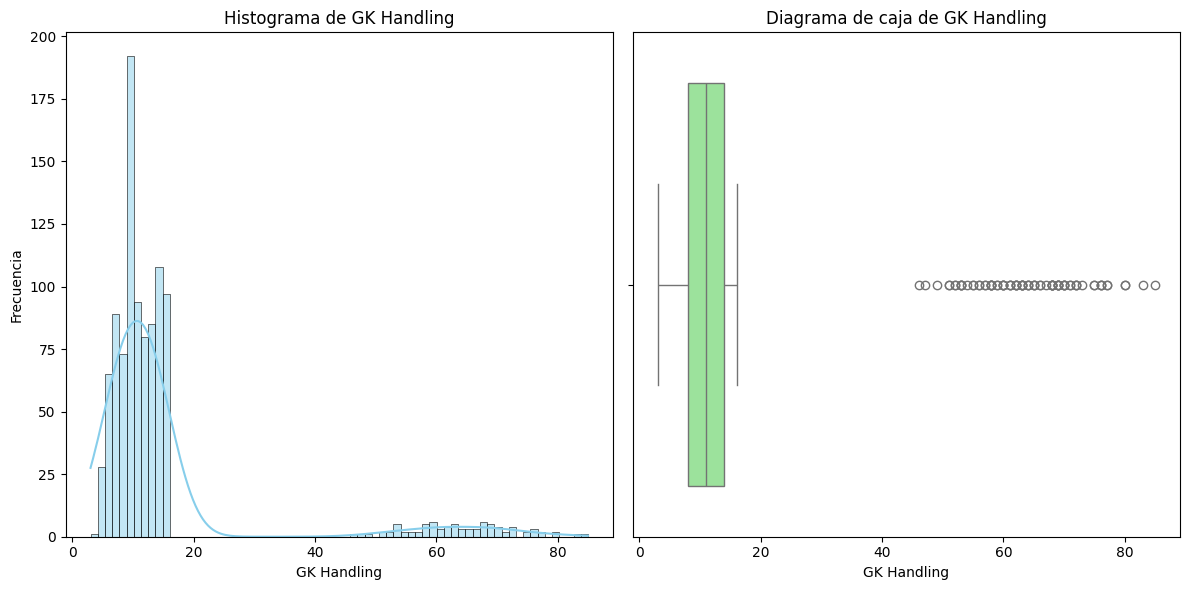

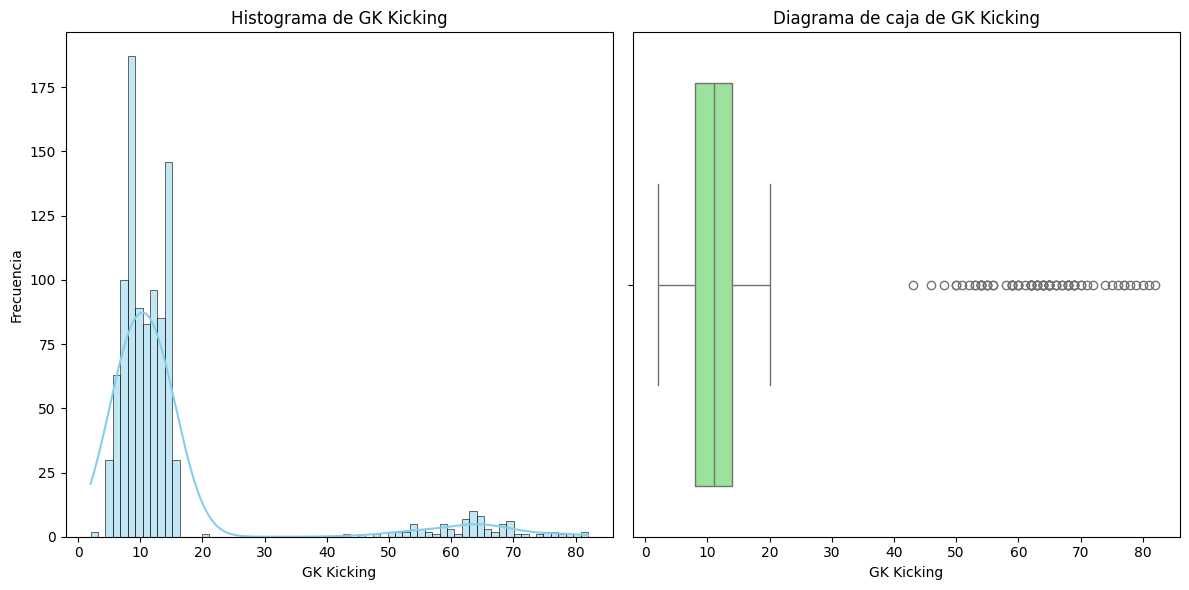

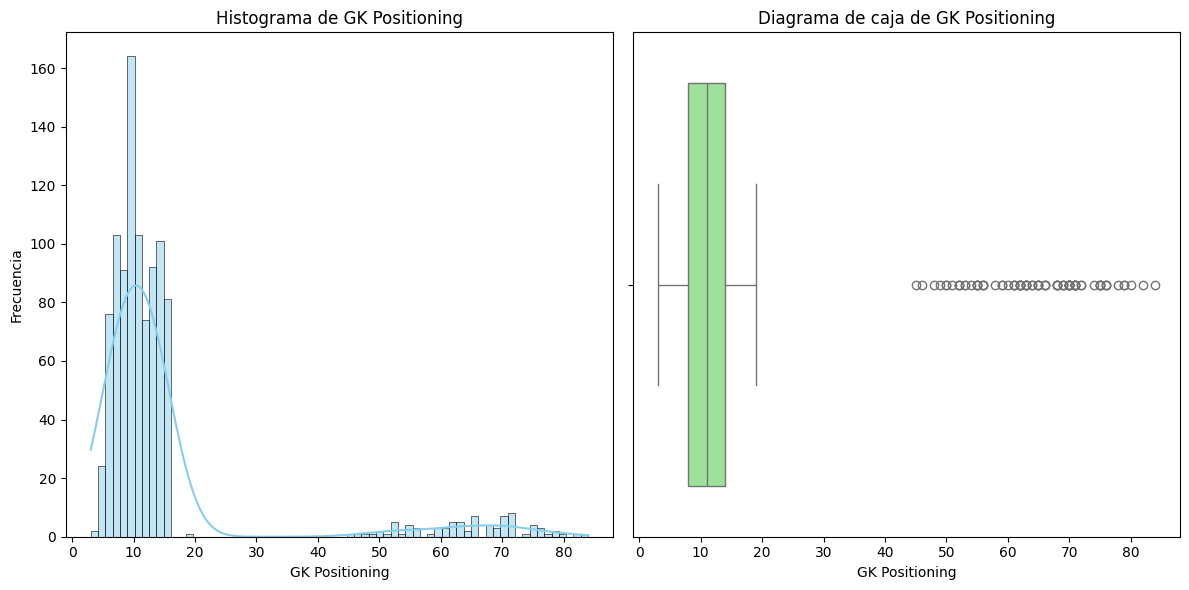

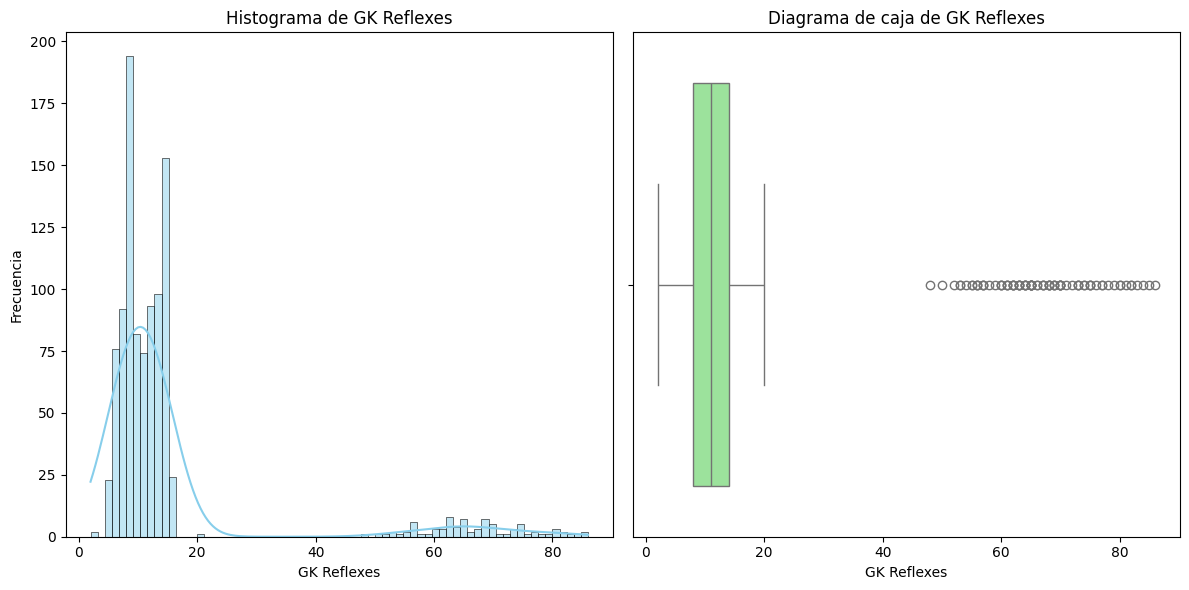

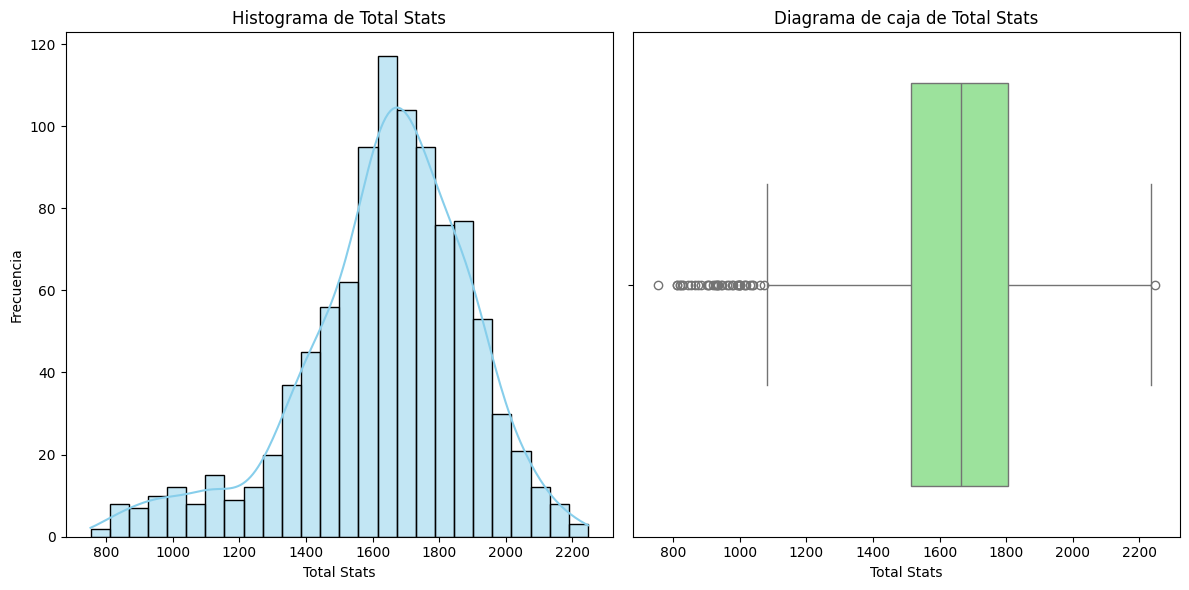

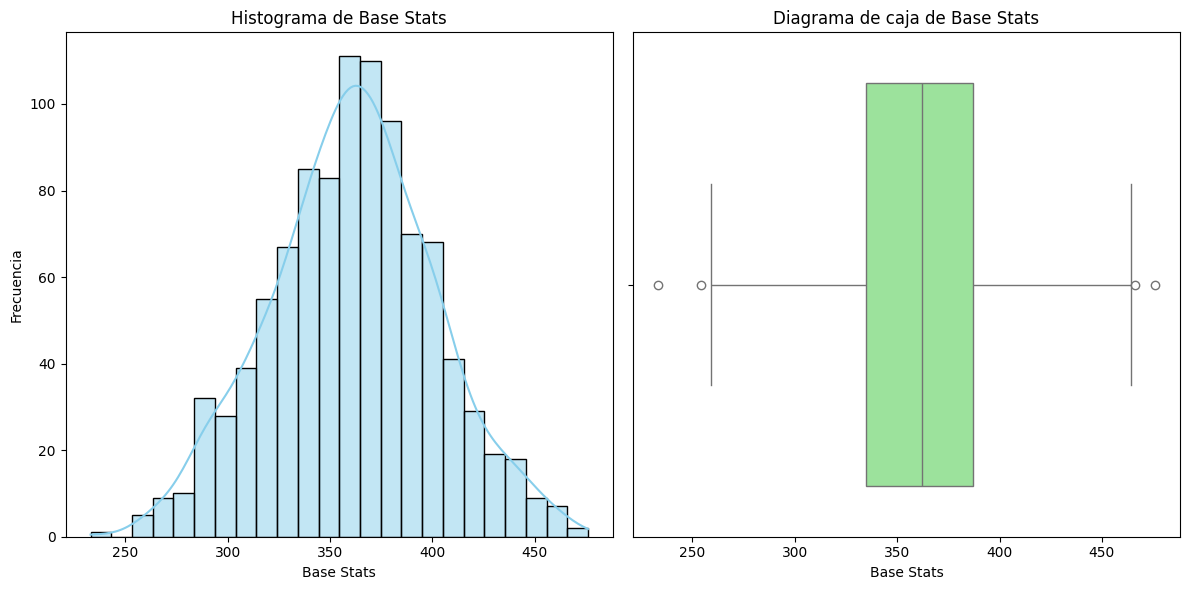

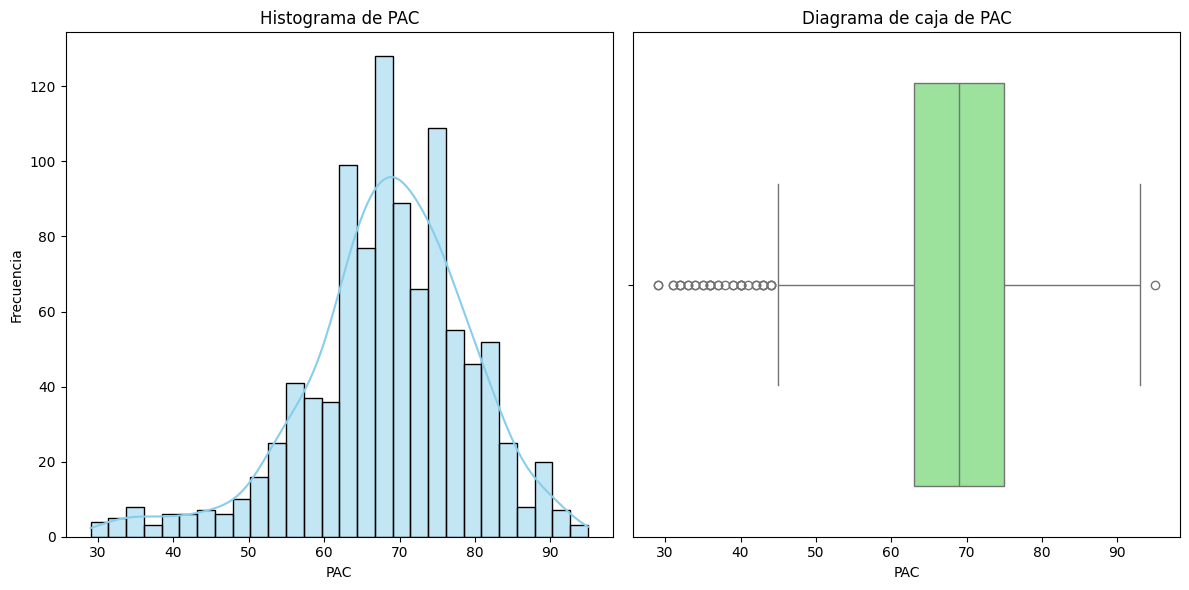

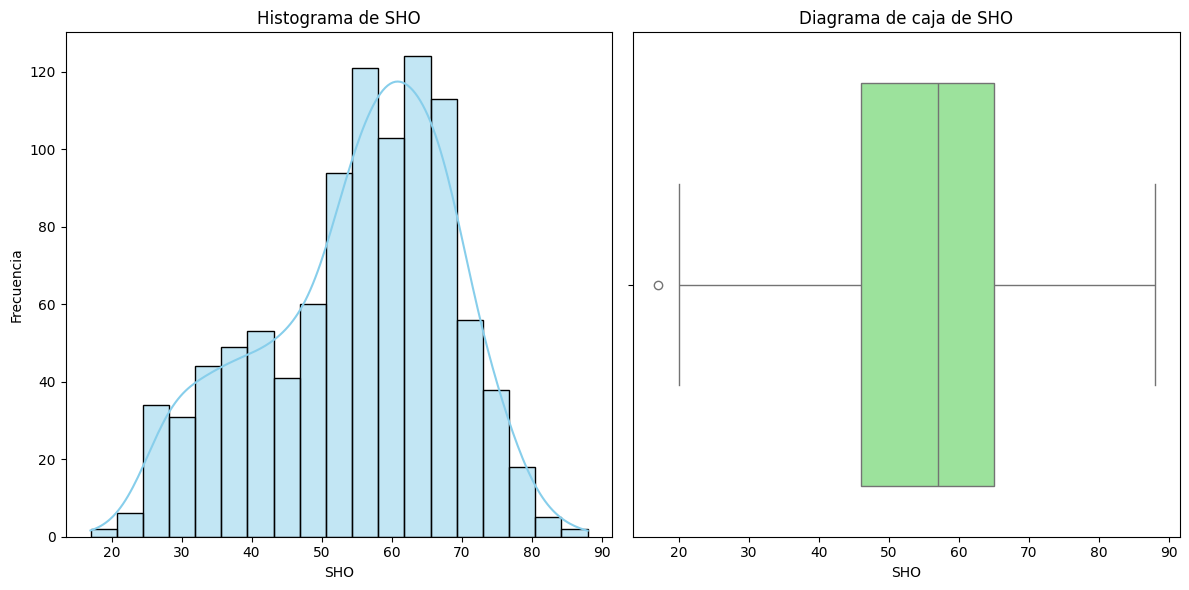

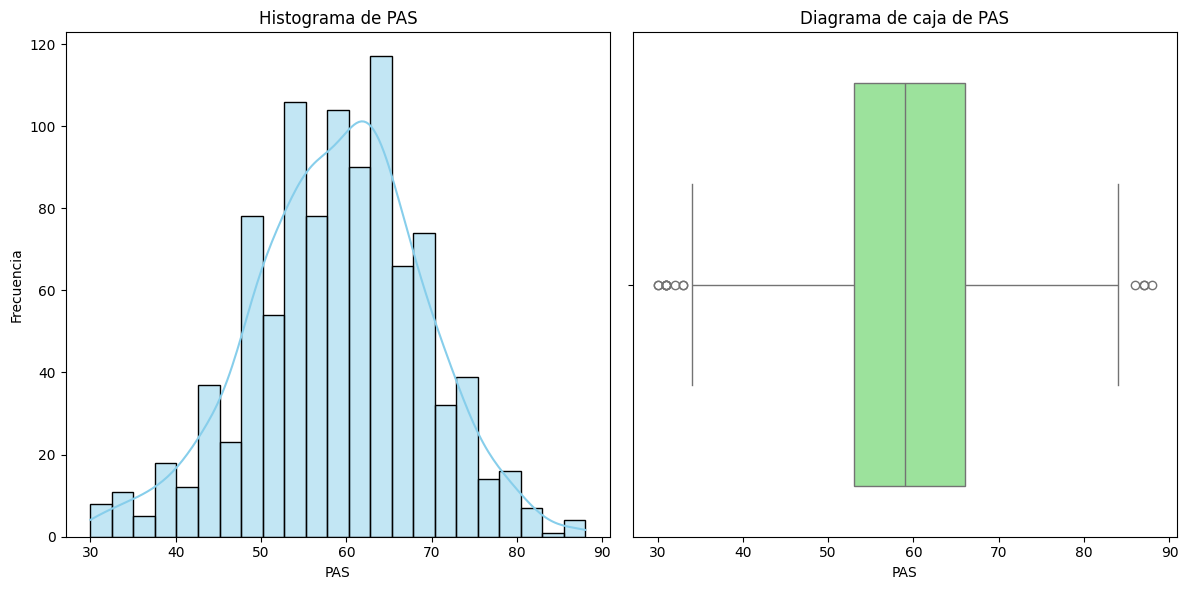

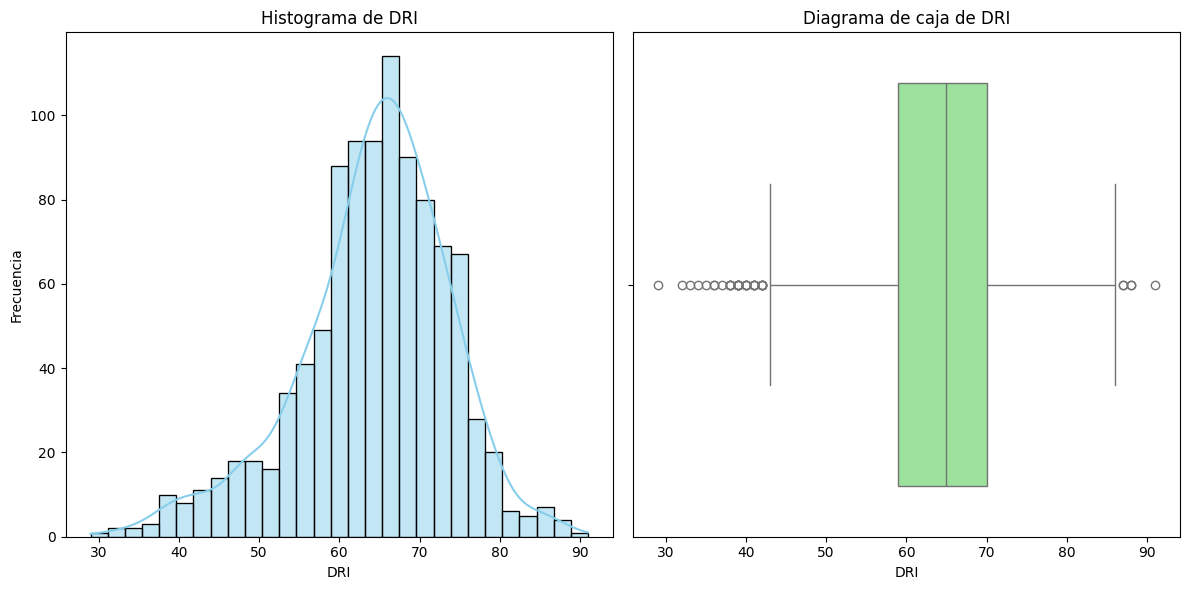

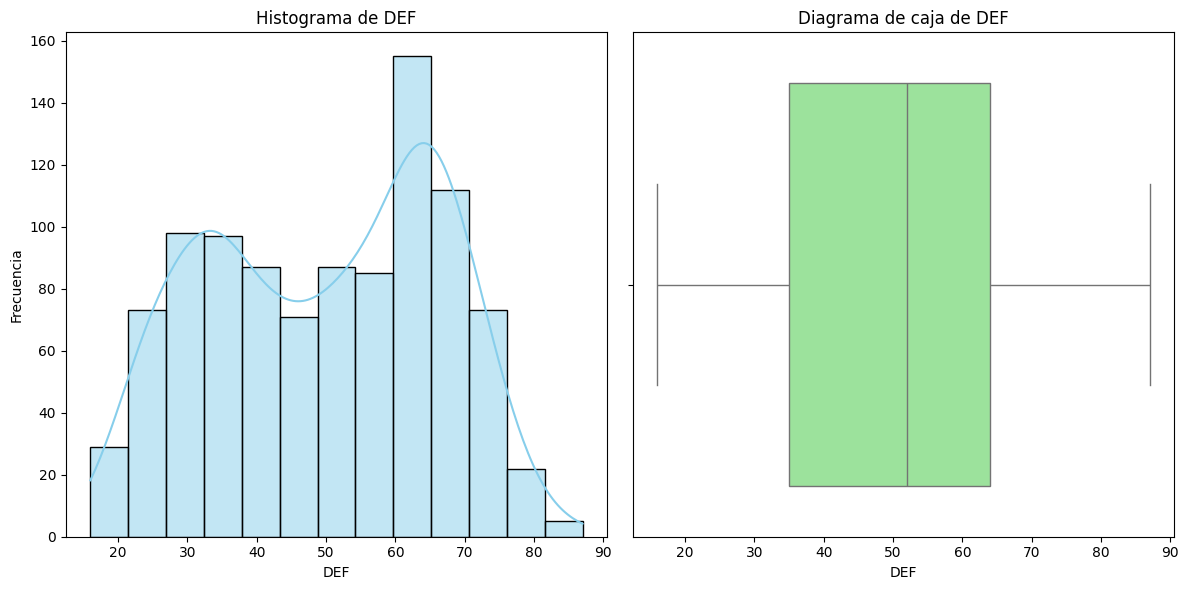

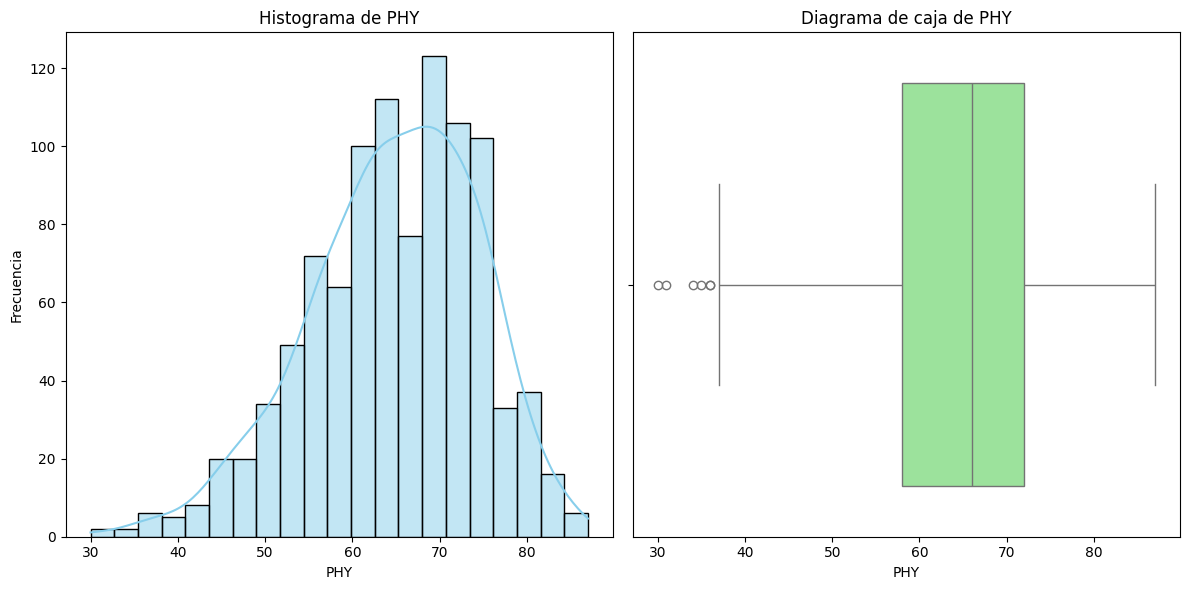

In [ ]:
for column in df.columns:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histograma
    sns.histplot(df[column], ax=axes[0], kde=True, color='skyblue', edgecolor='black')
    axes[0].set_title('Histograma de {}'.format(column))
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    # Diagrama de caja y bigotes
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen', linewidth=1)
    axes[1].set_title('Diagrama de caja de {}'.format(column))
    axes[1].set_xlabel(column)

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

In [ ]:
# Eliminar las columnas "Nationality" y "foot" del DataFrame
df_filtered = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns)

# Calcular la matriz de correlación
corr_matrix = df_filtered.corr()

# Aplicar un estilo de gradiente de color a la matriz de correlación
corr_matrix_styled = corr_matrix.style.background_gradient(cmap=plt.cm.coolwarm)

# Mostrar la matriz de correlación con el estilo aplicado
corr_matrix_styled

In [ ]:
columnas_a_mantener = ["Age", "Nationality", "foot", "POT", "OVA", "BOV", "Height", "PAC", "Base Stats", "Total Stats", "SHO", "PAS", "DRI", "DEF", "PHY"]

# Encuentra las columnas que deseas eliminar
columnas_a_eliminar = [col for col in df.columns if col not in columnas_a_mantener]

# Dropea las columnas que deseas eliminar
df = df.drop(columns=columnas_a_eliminar)

### Conclusion
Con base en este diagrama, se puede ver la correlación que tiene las diferentes variables. Teniendo en cuenta que en un principio se buscaba predecir el OVA, se mira específicamente esta columna. Las correlaciones en esas columnas no son fuertes, por lo tanto en un futuro puede que el modelo presente errores y sea necesario cambiar el objetivo.

#Árbol de decisión

##1.1 Normalización de los datos categóricos

In [ ]:
#Codificación de frecuencia para "Nationality" cuyos valores son nombres de países
# Calcular la frecuencia de cada categoría
frecuencia = df['Nationality'].value_counts()

# Aplicar la codificación de frecuencia
df['nationality_frecuencia'] = df['Nationality'].map(frecuencia)


#Codificación one hot para "foot" que contiene valores de left y right
df = pd.get_dummies(df, columns=['foot'])

# Imprimir el dataframe codificado

print(df)

       Age  OVA          Nationality  BOV  POT  Height  Total Stats  \
3722    29   69                Spain   70   69  177.80         1708   
5135    26   64           Montserrat   66   66  185.42         1429   
864     36   65  Republic of Ireland   66   65  180.34         1664   
5827    24   73              Germany   74   76  182.88         1900   
405     35   77                Spain   77   77  175.26         1909   
...    ...  ...                  ...  ...  ...     ...          ...   
3226    27   71              England   71   71  175.26         1646   
11761   24   65              Uruguay   67   72  175.26         1515   
17093   20   60                Ghana   62   75  170.18         1566   
6957    29   72              Senegal   74   72  180.34         2083   
3378    30   71               Mexico   71   71  172.72         1838   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  nationality_frecuencia  \
3722          365   74   64   65   75   33   54                      64 

In [ ]:
df = df.drop(["Nationality"], axis=1)
df

Age  OVA  BOV  POT  Height  Total Stats  Base Stats  PAC  SHO  PAS  \
3722    29   69   70   69  177.80         1708         365   74   64   65   
5135    26   64   66   66  185.42         1429         317   68   28   42   
864     36   65   66   65  180.34         1664         330   32   48   60   
5827    24   73   74   76  182.88         1900         400   75   68   67   
405     35   77   77   77  175.26         1909         397   68   76   76   
...    ...  ...  ...  ...     ...          ...         ...  ...  ...  ...   
3226    27   71   71   71  175.26         1646         366   85   58   62   
11761   24   65   67   72  175.26         1515         329   68   67   48   
17093   20   60   62   75  170.18         1566         341   71   47   58   
6957    29   72   74   72  180.34         2083         449   85   69   70   
3378    30   71   71   71  172.72         1838         395   83   64   65   

       DRI  DEF  PHY  nationality_frecuencia  foot_Left  foot_Right  
3722    75   33   54                      64      False        True  
5135    46   64   69                       1      False        True  
864     55   64   71                      18      False        True  
5827    77   45   68                      56      False        True  
405     79   36   62                      64      False        True  
...    ...  ...  ...                     ...        ...         ...  
3226    76   27   58                     110      False        True  
11761   65   29   52                      33      False        True  
17093   66   45   54                       8      False        True  
6957    75   71   79                       8      False        True  
3378    73   41   69                      21      False        True  

[994 rows x 16 columns]

In [ ]:
#División del dataset

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df[df.columns] # Features
X = df.drop(columns=['OVA'])

y = df.OVA # Target variable
nombres_columnas = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

X_train2, X_test2, y_train2, y_test_2 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

##1.2 Modelo del árbol de decisión

In [ ]:
#Modelo del árbol

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# feature_cols = ['Age', 'BOV','POT','Height','Weight', 'Base Stats', 'PAC', 'SHO', 'PAS','DRI', 'DEF', 'PHY']

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9, max_features=20)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4623115577889447


In [ ]:
!pip install graphviz

!pip install pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.739979 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.739979 to fit



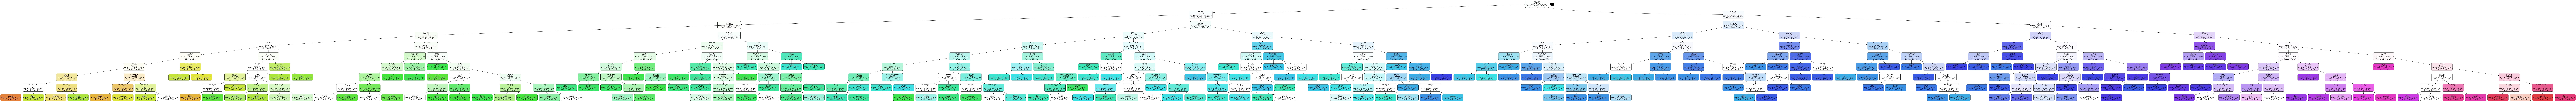

In [ ]:
#Visualización de árbol de decisión
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = nombres_columnas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fifa.png')
Image(graph.create_png())

## Conclusiones del Árbol
Ya que el arbol esta contruido con 17 columnas, es bastante extenso y dificil de interpretar. Sin embargo, decidimos continuar con las columnas que originalmente se tenían planeadas usar (Las que los expertos nos recomendaron) ya que segun el analisis, nos dan un accuracy aceptable.

# Conclusiones Generales

A partir de el EDA y la limpieza de datos, hemos definido las columnas con las cuales se va a armar el modelo, y los conjuntos de datos (datasets) que se van a usar para entrenar, probar y validar el algoritmo.

# K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.PAC

3722     74
5135     68
864      32
5827     75
405      68
         ..
3226     85
11761    68
17093    71
6957     85
3378     83
Name: PAC, Length: 994, dtype: int64

In [ ]:
selected_columns = ['OVA', 'PAC']
X = df[selected_columns].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

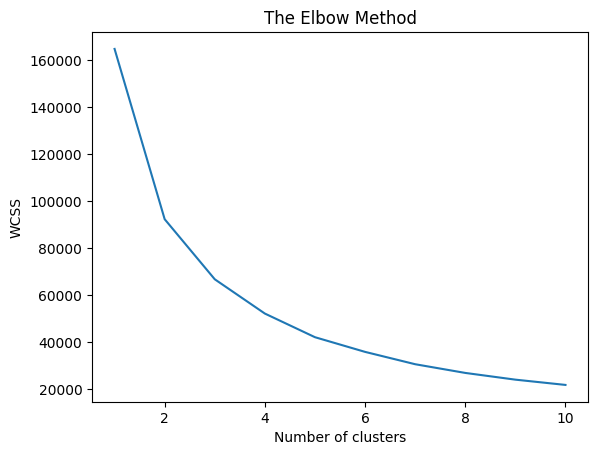

In [ ]:
#Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Como se puede ver en el gráfico del codo, el punto de inflexión que aparece es en el 3, lo cual indica que el número adecuado de clusters para este caso es de 3.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2,
       1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1,

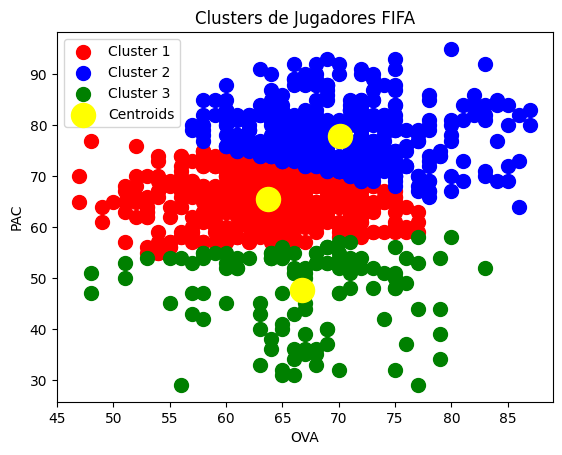

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Jugadores FIFA')
plt.xlabel('OVA')
plt.ylabel('PAC')
plt.legend()
plt.show()

El grupo azul incluye a los jugadores con mayor PAC, el rojo los de PAC medio y el verde los de PAC bajo.

Se hizo el K-Means de los jugadores con respecto al OVA (Overall) y al PAC (Pace). En la distribución de los datos podemos observar que tener un alto PAC no siempre va a  influir en tener un alto OVA. Por otro lado, se observa que los jugadores de mayor OVA (De 85 para arriba) siempre tienen un alto PAC.